# **Import thư viện**

In [1]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint, adfuller
import statistics as stats
import plotly.graph_objects as go
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import itertools
from heapq import nsmallest, nlargest
import matplotlib.pyplot as plt
import seaborn as sns
import more_itertools
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(20,14)})


In [2]:
# !pip3 uninstall statsmodels
# !pip3 install numpy scipy patsy pandas
# !pip3 install statsmodels

In [3]:
# from statsmodels.tsa.ardl import ardl_select_order
# from statsmodels.tsa.api import ARDL
# from statsmodels.tsa.api import UECM

# **Import dataset**

**Upload dataset từ file Google Drive**

*Lưu ý: nhớ mở quyền truy cập cho BẤT KỲ AI VỚI ĐƯỜNG LIÊN KẾT*

In [4]:
!gdown 1lX9QMg5kVev-DwiQ-sZdQu9Lul3Sv4oI

Downloading...
From: https://drive.google.com/uc?id=1lX9QMg5kVev-DwiQ-sZdQu9Lul3Sv4oI
To: /content/raw_pricewithoutvolume.xlsx
100% 315k/315k [00:00<00:00, 21.6MB/s]


Data ngân hàng đã được lọc các cột liên quan đến khối lượng giao dịch (volume)

**Đọc Dataset vừa upload** 

In [5]:
data = pd.read_excel("raw_pricewithoutvolume.xlsx")
data

Unnamed: 0       ACB.HM       BAB.HN       BID.HM       CTG.HM  \
0               Timestamp  Trade Close  Trade Close  Trade Close  Trade Close   
1     2022-08-22 00:00:00        24650        17100        38450        28000   
2     2022-08-19 00:00:00        24850        17300        39350        28250   
3     2022-08-18 00:00:00        25150        17400        39600        28750   
4     2022-08-17 00:00:00        24950        16700        40000        29100   
...                   ...          ...          ...          ...          ...   
2651  2012-01-09 00:00:00  4657.153246          NaN          NaN  7402.936545   
2652  2012-01-06 00:00:00  4681.036083          NaN          NaN  7362.036343   
2653  2012-01-05 00:00:00   4704.91892          NaN          NaN  7239.335737   
2654  2012-01-04 00:00:00  4609.387571          NaN          NaN  7280.235939   
2655  2012-01-03 00:00:00   4537.73906          NaN          NaN  6953.034324   

            EIB.HM       HDB.HM       LPB.HM       MBB.HM       MSB.HM  \
0      Trade Close  Trade Close  Trade Close  Trade Close  Trade Close   
1            29900        25450        15500        23100        19000   
2            29700        26250        15550   22999.9908        19250   
3            29900        26800        15650  23041.65745        19300   
4            30000        26750        15850  23124.99075        19300   
...            ...          ...          ...          ...          ...   
2651  11276.220749          NaN          NaN  2540.534083          NaN   
2652  11276.220749          NaN          NaN  2517.010619          NaN   
2653  11197.913661          NaN          NaN  2517.010619          NaN   
2654  11354.527838          NaN          NaN  2564.057546          NaN   
2655  11197.913661          NaN          NaN  2564.057546          NaN   

           NVB.HN       OCB.HM       SHB.HM       SSB.HM        STB.HM  \
0     Trade Close  Trade Close  Trade Close  Trade Close   Trade Close   
1           26500        17450        15550        32500         24700   
2           26000        17950        15450        31250         25100   
3           27800        17950        15500        31350         25200   
4           27700        18200        15600        31500         25400   
...           ...          ...          ...          ...           ...   
2651     6390.448          NaN  2033.402392          NaN  10297.390995   
2652     5991.045          NaN  2033.402392          NaN   9807.039043   
2653     5991.045          NaN  2033.402392          NaN   9684.451055   
2654    6310.5674          NaN  2069.076118          NaN   9807.039043   
2655     6390.448          NaN  2104.749844          NaN   9500.569073   

           TCB.HM       TPB.HM       VCB.HM       VIB.HM       VPB.HM  
0     Trade Close  Trade Close  Trade Close  Trade Close  Trade Close  
1           38700        27900        80000        25000        31250  
2           39000        28400        80900        25700        31250  
3           39100        28700        81500        26000        30050  
4           39300        28700        81500        26150        30150  
...           ...          ...          ...          ...          ...  
2651          NaN          NaN  8293.820423          NaN          NaN  
2652          NaN          NaN  8049.884528          NaN          NaN  
2653          NaN          NaN  8212.508458          NaN          NaN  
2654          NaN          NaN  8253.164441          NaN          NaN  
2655          NaN          NaN  8456.444353          NaN          NaN  

[2656 rows x 20 columns]

#**Data Preparation**

#### **Lấy 5 dòng đầu tiên và cuối cùng của bộ dữ liệu** 

In [6]:
data.head()

Unnamed: 0       ACB.HM       BAB.HN       BID.HM       CTG.HM  \
0            Timestamp  Trade Close  Trade Close  Trade Close  Trade Close   
1  2022-08-22 00:00:00        24650        17100        38450        28000   
2  2022-08-19 00:00:00        24850        17300        39350        28250   
3  2022-08-18 00:00:00        25150        17400        39600        28750   
4  2022-08-17 00:00:00        24950        16700        40000        29100   

        EIB.HM       HDB.HM       LPB.HM       MBB.HM       MSB.HM  \
0  Trade Close  Trade Close  Trade Close  Trade Close  Trade Close   
1        29900        25450        15500        23100        19000   
2        29700        26250        15550   22999.9908        19250   
3        29900        26800        15650  23041.65745        19300   
4        30000        26750        15850  23124.99075        19300   

        NVB.HN       OCB.HM       SHB.HM       SSB.HM       STB.HM  \
0  Trade Close  Trade Close  Trade Close  Trade Close  Trade Close   
1        26500        17450        15550        32500        24700   
2        26000        17950        15450        31250        25100   
3        27800        17950        15500        31350        25200   
4        27700        18200        15600        31500        25400   

        TCB.HM       TPB.HM       VCB.HM       VIB.HM       VPB.HM  
0  Trade Close  Trade Close  Trade Close  Trade Close  Trade Close  
1        38700        27900        80000        25000        31250  
2        39000        28400        80900        25700        31250  
3        39100        28700        81500        26000        30050  
4        39300        28700        81500        26150        30150

In [7]:
data.tail(5)

Unnamed: 0       ACB.HM BAB.HN BID.HM       CTG.HM  \
2651  2012-01-09 00:00:00  4657.153246    NaN    NaN  7402.936545   
2652  2012-01-06 00:00:00  4681.036083    NaN    NaN  7362.036343   
2653  2012-01-05 00:00:00   4704.91892    NaN    NaN  7239.335737   
2654  2012-01-04 00:00:00  4609.387571    NaN    NaN  7280.235939   
2655  2012-01-03 00:00:00   4537.73906    NaN    NaN  6953.034324   

            EIB.HM HDB.HM LPB.HM       MBB.HM MSB.HM     NVB.HN OCB.HM  \
2651  11276.220749    NaN    NaN  2540.534083    NaN   6390.448    NaN   
2652  11276.220749    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2653  11197.913661    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2654  11354.527838    NaN    NaN  2564.057546    NaN  6310.5674    NaN   
2655  11197.913661    NaN    NaN  2564.057546    NaN   6390.448    NaN   

           SHB.HM SSB.HM        STB.HM TCB.HM TPB.HM       VCB.HM VIB.HM  \
2651  2033.402392    NaN  10297.390995    NaN    NaN  8293.820423    NaN   
2652  2033.402392    NaN   9807.039043    NaN    NaN  8049.884528    NaN   
2653  2033.402392    NaN   9684.451055    NaN    NaN  8212.508458    NaN   
2654  2069.076118    NaN   9807.039043    NaN    NaN  8253.164441    NaN   
2655  2104.749844    NaN   9500.569073    NaN    NaN  8456.444353    NaN   

     VPB.HM  
2651    NaN  
2652    NaN  
2653    NaN  
2654    NaN  
2655    NaN

#### **Xóa dòng đầu tiên chứa Trade Close**

In [8]:
data.drop(0, inplace=True)

In [9]:
data

Unnamed: 0       ACB.HM BAB.HN BID.HM       CTG.HM  \
1     2022-08-22 00:00:00        24650  17100  38450        28000   
2     2022-08-19 00:00:00        24850  17300  39350        28250   
3     2022-08-18 00:00:00        25150  17400  39600        28750   
4     2022-08-17 00:00:00        24950  16700  40000        29100   
5     2022-08-16 00:00:00        24850  16900  40500        29200   
...                   ...          ...    ...    ...          ...   
2651  2012-01-09 00:00:00  4657.153246    NaN    NaN  7402.936545   
2652  2012-01-06 00:00:00  4681.036083    NaN    NaN  7362.036343   
2653  2012-01-05 00:00:00   4704.91892    NaN    NaN  7239.335737   
2654  2012-01-04 00:00:00  4609.387571    NaN    NaN  7280.235939   
2655  2012-01-03 00:00:00   4537.73906    NaN    NaN  6953.034324   

            EIB.HM HDB.HM LPB.HM       MBB.HM MSB.HM     NVB.HN OCB.HM  \
1            29900  25450  15500        23100  19000      26500  17450   
2            29700  26250  15550   22999.9908  19250      26000  17950   
3            29900  26800  15650  23041.65745  19300      27800  17950   
4            30000  26750  15850  23124.99075  19300      27700  18200   
5            30000  26350  16050  22708.32425  19250      28300  18250   
...            ...    ...    ...          ...    ...        ...    ...   
2651  11276.220749    NaN    NaN  2540.534083    NaN   6390.448    NaN   
2652  11276.220749    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2653  11197.913661    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2654  11354.527838    NaN    NaN  2564.057546    NaN  6310.5674    NaN   
2655  11197.913661    NaN    NaN  2564.057546    NaN   6390.448    NaN   

           SHB.HM SSB.HM        STB.HM TCB.HM TPB.HM       VCB.HM VIB.HM  \
1           15550  32500         24700  38700  27900        80000  25000   
2           15450  31250         25100  39000  28400        80900  25700   
3           15500  31350         25200  39100  28700        81500  26000   
4           15600  31500         25400  39300  28700        81500  26150   
5           15800  31450         25550  39000  28850        81500  26400   
...           ...    ...           ...    ...    ...          ...    ...   
2651  2033.402392    NaN  10297.390995    NaN    NaN  8293.820423    NaN   
2652  2033.402392    NaN   9807.039043    NaN    NaN  8049.884528    NaN   
2653  2033.402392    NaN   9684.451055    NaN    NaN  8212.508458    NaN   
2654  2069.076118    NaN   9807.039043    NaN    NaN  8253.164441    NaN   
2655  2104.749844    NaN   9500.569073    NaN    NaN  8456.444353    NaN   

     VPB.HM  
1     31250  
2     31250  
3     30050  
4     30150  
5     30150  
...     ...  
2651    NaN  
2652    NaN  
2653    NaN  
2654    NaN  
2655    NaN  

[2655 rows x 20 columns]

#### **Lấy thông tin về số lượng giá trị không rỗng và kiểu dữ liệu của từng biến** 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 1 to 2655
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2655 non-null   object
 1   ACB.HM      2650 non-null   object
 2   BAB.HN      1126 non-null   object
 3   BID.HM      2137 non-null   object
 4   CTG.HM      2653 non-null   object
 5   EIB.HM      2653 non-null   object
 6   HDB.HM      1154 non-null   object
 7   LPB.HM      1211 non-null   object
 8   MBB.HM      2653 non-null   object
 9   MSB.HM      414 non-null    object
 10  NVB.HN      2470 non-null   object
 11  OCB.HM      389 non-null    object
 12  SHB.HM      2652 non-null   object
 13  SSB.HM      355 non-null    object
 14  STB.HM      2653 non-null   object
 15  TCB.HM      1058 non-null   object
 16  TPB.HM      1087 non-null   object
 17  VCB.HM      2653 non-null   object
 18  VIB.HM      1396 non-null   object
 19  VPB.HM      1253 non-null   object
dtypes: objec

#### **Reset index dataframe**

In [11]:
data.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655],
           dtype='int64', length=2655)

**Thay đổi tên cột Unnamed: 0 thành Timestamp**

In [12]:
data.rename(columns = {'Unnamed: 0':'date_id'}, inplace = True)
data

date_id       ACB.HM BAB.HN BID.HM       CTG.HM  \
1     2022-08-22 00:00:00        24650  17100  38450        28000   
2     2022-08-19 00:00:00        24850  17300  39350        28250   
3     2022-08-18 00:00:00        25150  17400  39600        28750   
4     2022-08-17 00:00:00        24950  16700  40000        29100   
5     2022-08-16 00:00:00        24850  16900  40500        29200   
...                   ...          ...    ...    ...          ...   
2651  2012-01-09 00:00:00  4657.153246    NaN    NaN  7402.936545   
2652  2012-01-06 00:00:00  4681.036083    NaN    NaN  7362.036343   
2653  2012-01-05 00:00:00   4704.91892    NaN    NaN  7239.335737   
2654  2012-01-04 00:00:00  4609.387571    NaN    NaN  7280.235939   
2655  2012-01-03 00:00:00   4537.73906    NaN    NaN  6953.034324   

            EIB.HM HDB.HM LPB.HM       MBB.HM MSB.HM     NVB.HN OCB.HM  \
1            29900  25450  15500        23100  19000      26500  17450   
2            29700  26250  15550   22999.9908  19250      26000  17950   
3            29900  26800  15650  23041.65745  19300      27800  17950   
4            30000  26750  15850  23124.99075  19300      27700  18200   
5            30000  26350  16050  22708.32425  19250      28300  18250   
...            ...    ...    ...          ...    ...        ...    ...   
2651  11276.220749    NaN    NaN  2540.534083    NaN   6390.448    NaN   
2652  11276.220749    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2653  11197.913661    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2654  11354.527838    NaN    NaN  2564.057546    NaN  6310.5674    NaN   
2655  11197.913661    NaN    NaN  2564.057546    NaN   6390.448    NaN   

           SHB.HM SSB.HM        STB.HM TCB.HM TPB.HM       VCB.HM VIB.HM  \
1           15550  32500         24700  38700  27900        80000  25000   
2           15450  31250         25100  39000  28400        80900  25700   
3           15500  31350         25200  39100  28700        81500  26000   
4           15600  31500         25400  39300  28700        81500  26150   
5           15800  31450         25550  39000  28850        81500  26400   
...           ...    ...           ...    ...    ...          ...    ...   
2651  2033.402392    NaN  10297.390995    NaN    NaN  8293.820423    NaN   
2652  2033.402392    NaN   9807.039043    NaN    NaN  8049.884528    NaN   
2653  2033.402392    NaN   9684.451055    NaN    NaN  8212.508458    NaN   
2654  2069.076118    NaN   9807.039043    NaN    NaN  8253.164441    NaN   
2655  2104.749844    NaN   9500.569073    NaN    NaN  8456.444353    NaN   

     VPB.HM  
1     31250  
2     31250  
3     30050  
4     30150  
5     30150  
...     ...  
2651    NaN  
2652    NaN  
2653    NaN  
2654    NaN  
2655    NaN  

[2655 rows x 20 columns]

In [13]:
# đảo ngược data để năm 2012 lên trước, 2022 xuống sau 
data = data.loc[::-1]
data

date_id       ACB.HM BAB.HN BID.HM       CTG.HM  \
2655  2012-01-03 00:00:00   4537.73906    NaN    NaN  6953.034324   
2654  2012-01-04 00:00:00  4609.387571    NaN    NaN  7280.235939   
2653  2012-01-05 00:00:00   4704.91892    NaN    NaN  7239.335737   
2652  2012-01-06 00:00:00  4681.036083    NaN    NaN  7362.036343   
2651  2012-01-09 00:00:00  4657.153246    NaN    NaN  7402.936545   
...                   ...          ...    ...    ...          ...   
5     2022-08-16 00:00:00        24850  16900  40500        29200   
4     2022-08-17 00:00:00        24950  16700  40000        29100   
3     2022-08-18 00:00:00        25150  17400  39600        28750   
2     2022-08-19 00:00:00        24850  17300  39350        28250   
1     2022-08-22 00:00:00        24650  17100  38450        28000   

            EIB.HM HDB.HM LPB.HM       MBB.HM MSB.HM     NVB.HN OCB.HM  \
2655  11197.913661    NaN    NaN  2564.057546    NaN   6390.448    NaN   
2654  11354.527838    NaN    NaN  2564.057546    NaN  6310.5674    NaN   
2653  11197.913661    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2652  11276.220749    NaN    NaN  2517.010619    NaN   5991.045    NaN   
2651  11276.220749    NaN    NaN  2540.534083    NaN   6390.448    NaN   
...            ...    ...    ...          ...    ...        ...    ...   
5            30000  26350  16050  22708.32425  19250      28300  18250   
4            30000  26750  15850  23124.99075  19300      27700  18200   
3            29900  26800  15650  23041.65745  19300      27800  17950   
2            29700  26250  15550   22999.9908  19250      26000  17950   
1            29900  25450  15500        23100  19000      26500  17450   

           SHB.HM SSB.HM        STB.HM TCB.HM TPB.HM       VCB.HM VIB.HM  \
2655  2104.749844    NaN   9500.569073    NaN    NaN  8456.444353    NaN   
2654  2069.076118    NaN   9807.039043    NaN    NaN  8253.164441    NaN   
2653  2033.402392    NaN   9684.451055    NaN    NaN  8212.508458    NaN   
2652  2033.402392    NaN   9807.039043    NaN    NaN  8049.884528    NaN   
2651  2033.402392    NaN  10297.390995    NaN    NaN  8293.820423    NaN   
...           ...    ...           ...    ...    ...          ...    ...   
5           15800  31450         25550  39000  28850        81500  26400   
4           15600  31500         25400  39300  28700        81500  26150   
3           15500  31350         25200  39100  28700        81500  26000   
2           15450  31250         25100  39000  28400        80900  25700   
1           15550  32500         24700  38700  27900        80000  25000   

     VPB.HM  
2655    NaN  
2654    NaN  
2653    NaN  
2652    NaN  
2651    NaN  
...     ...  
5     30150  
4     30150  
3     30050  
2     31250  
1     31250  

[2655 rows x 20 columns]

**Thay đổi kiểu dữ liệu và reset index cột Timestamp**

In [14]:
data['date_id'] = pd.to_datetime(data['date_id'], format='%Y%m%d')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 2655 to 1
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date_id  2655 non-null   datetime64[ns]
 1   ACB.HM   2650 non-null   object        
 2   BAB.HN   1126 non-null   object        
 3   BID.HM   2137 non-null   object        
 4   CTG.HM   2653 non-null   object        
 5   EIB.HM   2653 non-null   object        
 6   HDB.HM   1154 non-null   object        
 7   LPB.HM   1211 non-null   object        
 8   MBB.HM   2653 non-null   object        
 9   MSB.HM   414 non-null    object        
 10  NVB.HN   2470 non-null   object        
 11  OCB.HM   389 non-null    object        
 12  SHB.HM   2652 non-null   object        
 13  SSB.HM   355 non-null    object        
 14  STB.HM   2653 non-null   object        
 15  TCB.HM   1058 non-null   object        
 16  TPB.HM   1087 non-null   object        
 17  VCB.HM   2653 non-null   object  

In [16]:
data.set_index('date_id',inplace=True)

In [17]:
data.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-16',
               ...
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-22'],
              dtype='datetime64[ns]', name='date_id', length=2655, freq=None)

###**Cắt dữ liệu từ Tháng 1/2020 đến hết Tháng 6/2022** 

---



In [18]:
cut_data = data['2020-01-02':'2022-06-30']

In [19]:
cut_data

ACB.HM        BAB.HN        BID.HM        CTG.HM EIB.HM  \
date_id                                                                     
2020-01-02   11323.08032   14464.22289  36500.061732  16030.227277  17700   
2020-01-03   11323.08032   14464.22289  36344.411148  15881.108884  17250   
2020-01-06    11076.9264  14384.310057  35643.983525  15918.388482  17500   
2020-01-07    11076.9264  14384.310057  36344.411148   16179.34567  17450   
2020-01-08  10880.003264  14384.310057  36655.712315  16142.066072  17300   
...                  ...           ...           ...           ...    ...   
2022-06-24         23800    15555.5568         31200         24750  31450   
2022-06-27         23950     16203.705         31750         25600  31450   
2022-06-28         24500    16759.2606         33650         26700  33550   
2022-06-29         24200    16481.4828         34900         26850  32000   
2022-06-30         24000    16296.2976         33500         26150  32000   

                  HDB.HM       LPB.HM        MBB.HM MSB.HM     NVB.HN OCB.HM  \
date_id                                                                        
2020-01-02   13478.76517  5070.964489  11275.346913    NaN  7349.0152    NaN   
2020-01-03  13357.553253  5070.964489  11301.939712    NaN  7349.0152    NaN   
2020-01-06  13090.887036  4937.518055  11142.382916    NaN  7349.0152    NaN   
2020-01-07  12945.432735  4937.518055  11168.975715    NaN  7269.1346    NaN   
2020-01-08  12945.432735  4937.518055  11009.418919    NaN  7349.0152    NaN   
...                  ...          ...           ...    ...        ...    ...   
2022-06-24         23000        13200    19749.9921  16550      32400  16600   
2022-06-27         23350        12600    20083.3253  16850      31400  16600   
2022-06-28         24250        13400    20583.3251  17200      30900  17300   
2022-06-29         24400        13500    20583.3251  17250      31900  17450   
2022-06-30         24000        13050    20166.6586  17000      32400  16800   

                 SHB.HM SSB.HM STB.HM TCB.HM        TPB.HM        VCB.HM  \
date_id                                                                    
2020-01-02  4075.030941    NaN  10200  23800  12913.545095  69727.858228   
2020-01-03  3953.388226    NaN  10200  23650   13034.79904  69036.723069   
2020-01-06  3892.566869    NaN  10050  23050  12822.604637  67193.695979   
2020-01-07  3892.566869    NaN  10150  23200  12852.918123  67424.074365   
2020-01-08  3892.566869    NaN   9980  22750  12671.037206  66809.732002   
...                 ...    ...    ...    ...           ...           ...   
2022-06-24        13500  31200  21200  35500         26000         75000   
2022-06-27        13650  31350  21500  35550         26700         74900   
2022-06-28        14150  31450  22550  36700         27600         76300   
2022-06-29        14000  31600  22600  36750         27400         75500   
2022-06-30        13500  31600  21500  35550         27150         74800   

                 VIB.HM        VPB.HM  
date_id                                
2020-01-02   7760.14381  11416.790655  
2020-01-03  7716.052083  11333.456417  
2020-01-06  7583.776905  11083.453702  
2020-01-07  7583.776905  11305.678337  
2020-01-08  7451.501726   11166.78794  
...                 ...           ...  
2022-06-24        20600         28150  
2022-06-27        20700         28900  
2022-06-28        22100         30000  
2022-06-29        22400         30000  
2022-06-30        21500         29000  

[622 rows x 19 columns]

In [20]:
# distribution of the data
fig = px.box(cut_data)
fig.show()

**Đếm số giá trị riêng biệt của từng biến**

In [21]:
cut_data.nunique()

ACB.HM    312
BAB.HN    154
BID.HM    389
CTG.HM    433
EIB.HM    255
HDB.HM    383
LPB.HM    306
MBB.HM    355
MSB.HM    237
NVB.HN    203
OCB.HM    207
SHB.HM    266
SSB.HM    204
STB.HM    343
TCB.HM    312
TPB.HM    366
VCB.HM    328
VIB.HM    388
VPB.HM    383
dtype: int64

### **Phát hiện giá trị rỗng và loại bỏ cột có tỉ lệ missing data lớn**

In [22]:
# tính số giá trị rỗng của mỗi cột 
cut_data.isnull().sum()

ACB.HM      5
BAB.HN     33
BID.HM      0
CTG.HM      0
EIB.HM      0
HDB.HM      0
LPB.HM     10
MBB.HM      0
MSB.HM    245
NVB.HN      0
OCB.HM    270
SHB.HM      3
SSB.HM    304
STB.HM      0
TCB.HM      0
TPB.HM      0
VCB.HM      0
VIB.HM      7
VPB.HM      0
dtype: int64

**Tỉ lệ có giá trị rỗng của mỗi cột**

In [23]:
temp = ((cut_data.isnull() | cut_data.isna()).sum() * 100 / (cut_data.index.size))
# temp is panda Series type

missing_percentage_df = pd.DataFrame({'stock':temp.index, 'percentage':temp.values})
# mapping Series type to Dataframe type

missing_percentage_df

stock  percentage
0   ACB.HM    0.803859
1   BAB.HN    5.305466
2   BID.HM    0.000000
3   CTG.HM    0.000000
4   EIB.HM    0.000000
5   HDB.HM    0.000000
6   LPB.HM    1.607717
7   MBB.HM    0.000000
8   MSB.HM   39.389068
9   NVB.HN    0.000000
10  OCB.HM   43.408360
11  SHB.HM    0.482315
12  SSB.HM   48.874598
13  STB.HM    0.000000
14  TCB.HM    0.000000
15  TPB.HM    0.000000
16  VCB.HM    0.000000
17  VIB.HM    1.125402
18  VPB.HM    0.000000

**Tính trung bình và vẽ boxplot tỉ lệ giá trị bị khuyết** 

In [24]:
average_missing_percentage =  stats.mean(missing_percentage_df['percentage'])
print(average_missing_percentage)

7.420883398206126


In [25]:
fig = go.Figure()
fig.add_trace(go.Box(x=missing_percentage_df['percentage'], name="Percentage"))

fig.show()

**Loại bỏ cột MSB.HM, OCB.HM, SSB.HM (missing percentage > 50%)** 

In [26]:
# data đã cắt từ T1/2019 đến T6/2021 chưa bỏ cột MSB.HM, OCB.HM, SSB.HM
cut_data

ACB.HM        BAB.HN        BID.HM        CTG.HM EIB.HM  \
date_id                                                                     
2020-01-02   11323.08032   14464.22289  36500.061732  16030.227277  17700   
2020-01-03   11323.08032   14464.22289  36344.411148  15881.108884  17250   
2020-01-06    11076.9264  14384.310057  35643.983525  15918.388482  17500   
2020-01-07    11076.9264  14384.310057  36344.411148   16179.34567  17450   
2020-01-08  10880.003264  14384.310057  36655.712315  16142.066072  17300   
...                  ...           ...           ...           ...    ...   
2022-06-24         23800    15555.5568         31200         24750  31450   
2022-06-27         23950     16203.705         31750         25600  31450   
2022-06-28         24500    16759.2606         33650         26700  33550   
2022-06-29         24200    16481.4828         34900         26850  32000   
2022-06-30         24000    16296.2976         33500         26150  32000   

                  HDB.HM       LPB.HM        MBB.HM MSB.HM     NVB.HN OCB.HM  \
date_id                                                                        
2020-01-02   13478.76517  5070.964489  11275.346913    NaN  7349.0152    NaN   
2020-01-03  13357.553253  5070.964489  11301.939712    NaN  7349.0152    NaN   
2020-01-06  13090.887036  4937.518055  11142.382916    NaN  7349.0152    NaN   
2020-01-07  12945.432735  4937.518055  11168.975715    NaN  7269.1346    NaN   
2020-01-08  12945.432735  4937.518055  11009.418919    NaN  7349.0152    NaN   
...                  ...          ...           ...    ...        ...    ...   
2022-06-24         23000        13200    19749.9921  16550      32400  16600   
2022-06-27         23350        12600    20083.3253  16850      31400  16600   
2022-06-28         24250        13400    20583.3251  17200      30900  17300   
2022-06-29         24400        13500    20583.3251  17250      31900  17450   
2022-06-30         24000        13050    20166.6586  17000      32400  16800   

                 SHB.HM SSB.HM STB.HM TCB.HM        TPB.HM        VCB.HM  \
date_id                                                                    
2020-01-02  4075.030941    NaN  10200  23800  12913.545095  69727.858228   
2020-01-03  3953.388226    NaN  10200  23650   13034.79904  69036.723069   
2020-01-06  3892.566869    NaN  10050  23050  12822.604637  67193.695979   
2020-01-07  3892.566869    NaN  10150  23200  12852.918123  67424.074365   
2020-01-08  3892.566869    NaN   9980  22750  12671.037206  66809.732002   
...                 ...    ...    ...    ...           ...           ...   
2022-06-24        13500  31200  21200  35500         26000         75000   
2022-06-27        13650  31350  21500  35550         26700         74900   
2022-06-28        14150  31450  22550  36700         27600         76300   
2022-06-29        14000  31600  22600  36750         27400         75500   
2022-06-30        13500  31600  21500  35550         27150         74800   

                 VIB.HM        VPB.HM  
date_id                                
2020-01-02   7760.14381  11416.790655  
2020-01-03  7716.052083  11333.456417  
2020-01-06  7583.776905  11083.453702  
2020-01-07  7583.776905  11305.678337  
2020-01-08  7451.501726   11166.78794  
...                 ...           ...  
2022-06-24        20600         28150  
2022-06-27        20700         28900  
2022-06-28        22100         30000  
2022-06-29        22400         30000  
2022-06-30        21500         29000  

[622 rows x 19 columns]

In [27]:
cut_data.drop(columns=['MSB.HM', 'OCB.HM', 'SSB.HM'], axis=1, inplace=True)

In [28]:
# data đã cắt từ T1/2019 đến hết T6/2021 sau khi bỏ cột MSB.HM, OCB.HM, SSB.HM
cut_data

ACB.HM        BAB.HN        BID.HM        CTG.HM EIB.HM  \
date_id                                                                     
2020-01-02   11323.08032   14464.22289  36500.061732  16030.227277  17700   
2020-01-03   11323.08032   14464.22289  36344.411148  15881.108884  17250   
2020-01-06    11076.9264  14384.310057  35643.983525  15918.388482  17500   
2020-01-07    11076.9264  14384.310057  36344.411148   16179.34567  17450   
2020-01-08  10880.003264  14384.310057  36655.712315  16142.066072  17300   
...                  ...           ...           ...           ...    ...   
2022-06-24         23800    15555.5568         31200         24750  31450   
2022-06-27         23950     16203.705         31750         25600  31450   
2022-06-28         24500    16759.2606         33650         26700  33550   
2022-06-29         24200    16481.4828         34900         26850  32000   
2022-06-30         24000    16296.2976         33500         26150  32000   

                  HDB.HM       LPB.HM        MBB.HM     NVB.HN       SHB.HM  \
date_id                                                                       
2020-01-02   13478.76517  5070.964489  11275.346913  7349.0152  4075.030941   
2020-01-03  13357.553253  5070.964489  11301.939712  7349.0152  3953.388226   
2020-01-06  13090.887036  4937.518055  11142.382916  7349.0152  3892.566869   
2020-01-07  12945.432735  4937.518055  11168.975715  7269.1346  3892.566869   
2020-01-08  12945.432735  4937.518055  11009.418919  7349.0152  3892.566869   
...                  ...          ...           ...        ...          ...   
2022-06-24         23000        13200    19749.9921      32400        13500   
2022-06-27         23350        12600    20083.3253      31400        13650   
2022-06-28         24250        13400    20583.3251      30900        14150   
2022-06-29         24400        13500    20583.3251      31900        14000   
2022-06-30         24000        13050    20166.6586      32400        13500   

           STB.HM TCB.HM        TPB.HM        VCB.HM       VIB.HM  \
date_id                                                             
2020-01-02  10200  23800  12913.545095  69727.858228   7760.14381   
2020-01-03  10200  23650   13034.79904  69036.723069  7716.052083   
2020-01-06  10050  23050  12822.604637  67193.695979  7583.776905   
2020-01-07  10150  23200  12852.918123  67424.074365  7583.776905   
2020-01-08   9980  22750  12671.037206  66809.732002  7451.501726   
...           ...    ...           ...           ...          ...   
2022-06-24  21200  35500         26000         75000        20600   
2022-06-27  21500  35550         26700         74900        20700   
2022-06-28  22550  36700         27600         76300        22100   
2022-06-29  22600  36750         27400         75500        22400   
2022-06-30  21500  35550         27150         74800        21500   

                  VPB.HM  
date_id                   
2020-01-02  11416.790655  
2020-01-03  11333.456417  
2020-01-06  11083.453702  
2020-01-07  11305.678337  
2020-01-08   11166.78794  
...                  ...  
2022-06-24         28150  
2022-06-27         28900  
2022-06-28         30000  
2022-06-29         30000  
2022-06-30         29000  

[622 rows x 16 columns]

<AxesSubplot:>

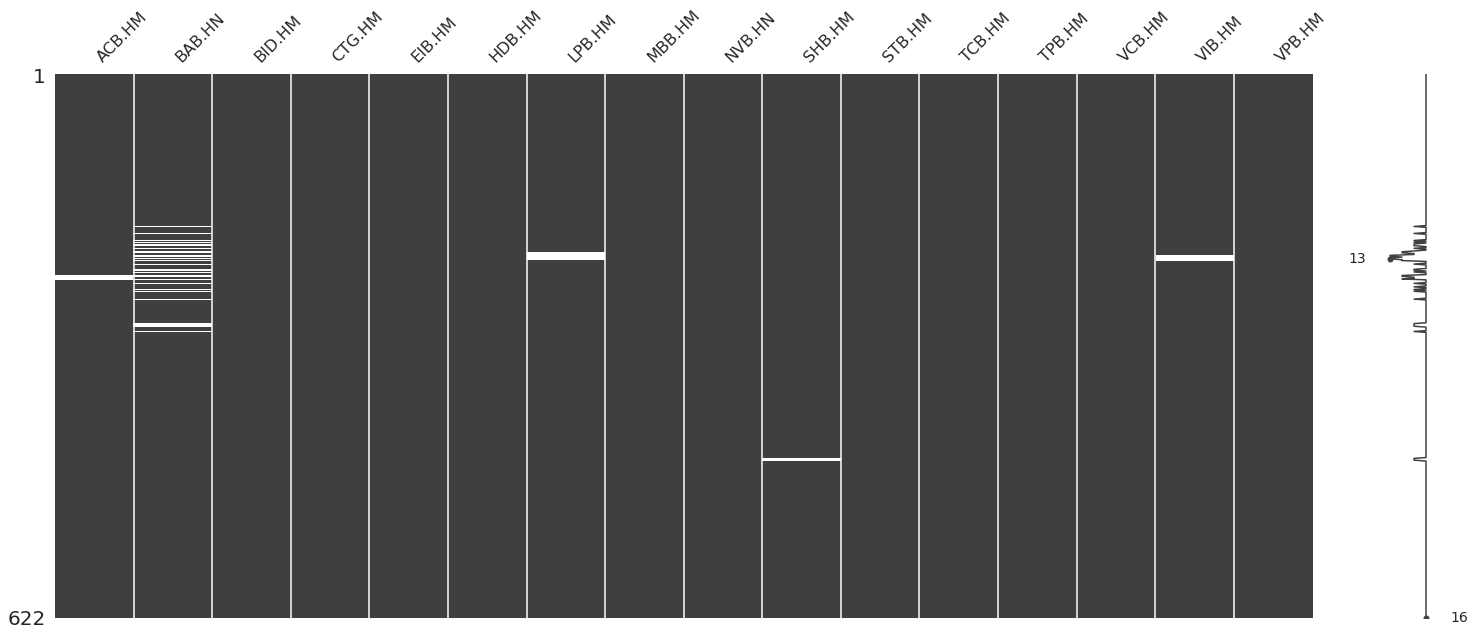

In [29]:
# xem vị trí các missing data trong từng cột 
msno.matrix(cut_data)

In [30]:
cut_data.isnull().sum()

ACB.HM     5
BAB.HN    33
BID.HM     0
CTG.HM     0
EIB.HM     0
HDB.HM     0
LPB.HM    10
MBB.HM     0
NVB.HN     0
SHB.HM     3
STB.HM     0
TCB.HM     0
TPB.HM     0
VCB.HM     0
VIB.HM     7
VPB.HM     0
dtype: int64

##**Impute dữ liệu khuyết** 

### **Phương pháp trung bình 5 ngày trước đó** 

Các dữ liệu khuyết sẽ được tính bằng cách lấy trung bình của 5 giá trị (mỗi tuần thì giao dịch sẽ được thực hiện trong 5 ngày từ thứ hai đến thứ 6) của thời điểm trước nó. (Phương pháp Simple Moving Average)

Vấn đề: do không có dữ liệu trong khoảng thời gian 2 ngày t7-cn, thì pp trung bình động có ổn hay không, trong thời điểm đó thị trường còn có sự biến động thì giá tính bằng trung bình động có chính xác hay không?

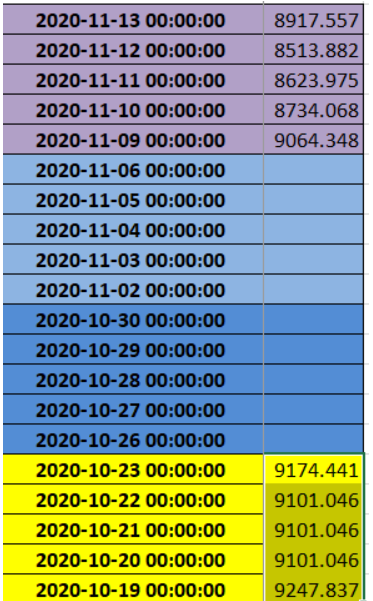

In [31]:
# # tạo một dataframe mới để chứa các giá trị sau khi thực hiện thay thế dữ liệu (imputation) 
# imputed_data = cut_data.copy()

In [32]:
# đầu vào của hàm gồm dataframe và cột cổ phiếu cần xử lý
# kết quả trả về: các giá trị rỗng trong cột cổ phiếu của dataframe đầu vào sẽ được thay thế bằng các giá trị mới 

# def rolling_imputation(data, stock):
#     stock_name = stock
#     temp_df = data[stock_name].copy().reset_index()

#     nan_df = temp_df[temp_df.isna().any(axis=1)]
#     nan_index_list = nan_df.index.tolist()


#     for element in nan_index_list[::-1]:
#         rolling_df = temp_df[stock_name].iloc[element+1:element+6]
#         rolling_value = sum(rolling_df)/len(rolling_df)
#         temp_df.loc[element, stock_name] = rolling_value
#     data[stock_name] = temp_df[stock_name].values


Xử lý missing data cột ACB.HM, BAB.HN, LPB.HM, SHB.HM, VIB.HM

In [33]:
# rolling_imputation(imputed_data, 'ACB.HM')

In [34]:
# imputed_data['ACB.HM']["2020-12-01":"2020-12-08"]

In [35]:
# rolling_imputation(imputed_data, 'BAB.HN')

In [36]:
# rolling_imputation(imputed_data, 'LPB.HM')

In [37]:
# rolling_imputation(imputed_data, 'SHB.HM')

In [38]:
# rolling_imputation(imputed_data, 'VIB.HM')

### **Phương pháp LOCF** 

In [39]:
# tạo một dataframe mới để chứa các giá trị sau khi thực hiện thay thế dữ liệu (imputation) 
imputed_data = cut_data.copy()

In [40]:
imputed_data = imputed_data.fillna(method='ffill')

In [41]:
imputed_data.isnull().sum()

ACB.HM    0
BAB.HN    0
BID.HM    0
CTG.HM    0
EIB.HM    0
HDB.HM    0
LPB.HM    0
MBB.HM    0
NVB.HN    0
SHB.HM    0
STB.HM    0
TCB.HM    0
TPB.HM    0
VCB.HM    0
VIB.HM    0
VPB.HM    0
dtype: int64

<AxesSubplot:>

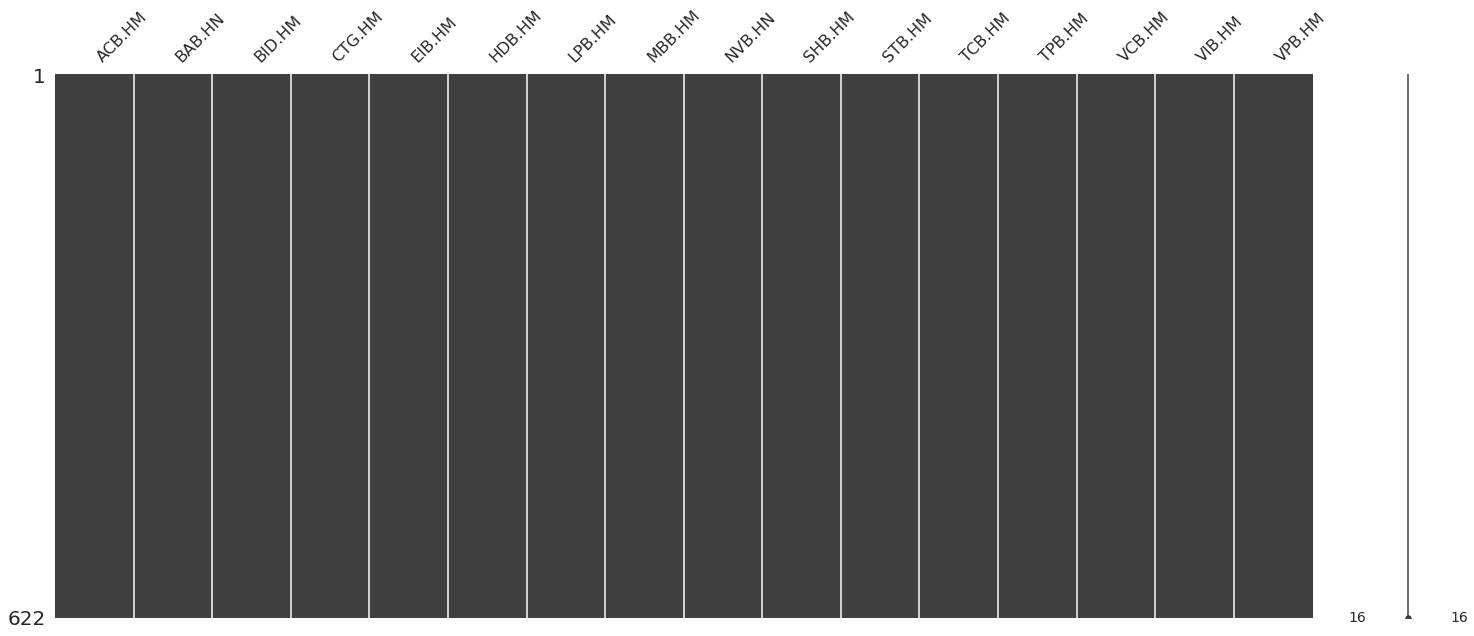

In [42]:
msno.matrix(imputed_data)

In [43]:
fig = px.line(imputed_data, width=1500, height=900)
fig.show()

In [44]:
imputed_data['ACB.HM']["2020-12-01":"2020-12-08"]

date_id
2020-12-01    17472.0
2020-12-02    17472.0
2020-12-03    17472.0
2020-12-04    17472.0
2020-12-07    17472.0
2020-12-08    17472.0
Name: ACB.HM, dtype: float64

In [45]:
imputed_data.to_excel("Imputed_Time Frame 2 02.01.2020 - 30.06.2022.xlsx")

## **Chia tập train/test** 

In [46]:
train_set = imputed_data['2020-01-02':'2021-12-31']
test_set = imputed_data['2022-01-04':'2022-06-30']

In [47]:
imputed_data

ACB.HM        BAB.HN        BID.HM        CTG.HM  EIB.HM  \
date_id                                                                      
2020-01-02  11323.080320  14464.222890  36500.061732  16030.227277   17700   
2020-01-03  11323.080320  14464.222890  36344.411148  15881.108884   17250   
2020-01-06  11076.926400  14384.310057  35643.983525  15918.388482   17500   
2020-01-07  11076.926400  14384.310057  36344.411148  16179.345670   17450   
2020-01-08  10880.003264  14384.310057  36655.712315  16142.066072   17300   
...                  ...           ...           ...           ...     ...   
2022-06-24  23800.000000  15555.556800  31200.000000  24750.000000   31450   
2022-06-27  23950.000000  16203.705000  31750.000000  25600.000000   31450   
2022-06-28  24500.000000  16759.260600  33650.000000  26700.000000   33550   
2022-06-29  24200.000000  16481.482800  34900.000000  26850.000000   32000   
2022-06-30  24000.000000  16296.297600  33500.000000  26150.000000   32000   

                  HDB.HM        LPB.HM        MBB.HM      NVB.HN  \
date_id                                                            
2020-01-02  13478.765170   5070.964489  11275.346913   7349.0152   
2020-01-03  13357.553253   5070.964489  11301.939712   7349.0152   
2020-01-06  13090.887036   4937.518055  11142.382916   7349.0152   
2020-01-07  12945.432735   4937.518055  11168.975715   7269.1346   
2020-01-08  12945.432735   4937.518055  11009.418919   7349.0152   
...                  ...           ...           ...         ...   
2022-06-24  23000.000000  13200.000000  19749.992100  32400.0000   
2022-06-27  23350.000000  12600.000000  20083.325300  31400.0000   
2022-06-28  24250.000000  13400.000000  20583.325100  30900.0000   
2022-06-29  24400.000000  13500.000000  20583.325100  31900.0000   
2022-06-30  24000.000000  13050.000000  20166.658600  32400.0000   

                  SHB.HM  STB.HM  TCB.HM        TPB.HM        VCB.HM  \
date_id                                                                
2020-01-02   4075.030941   10200   23800  12913.545095  69727.858228   
2020-01-03   3953.388226   10200   23650  13034.799040  69036.723069   
2020-01-06   3892.566869   10050   23050  12822.604637  67193.695979   
2020-01-07   3892.566869   10150   23200  12852.918123  67424.074365   
2020-01-08   3892.566869    9980   22750  12671.037206  66809.732002   
...                  ...     ...     ...           ...           ...   
2022-06-24  13500.000000   21200   35500  26000.000000  75000.000000   
2022-06-27  13650.000000   21500   35550  26700.000000  74900.000000   
2022-06-28  14150.000000   22550   36700  27600.000000  76300.000000   
2022-06-29  14000.000000   22600   36750  27400.000000  75500.000000   
2022-06-30  13500.000000   21500   35550  27150.000000  74800.000000   

                  VIB.HM        VPB.HM  
date_id                                 
2020-01-02   7760.143810  11416.790655  
2020-01-03   7716.052083  11333.456417  
2020-01-06   7583.776905  11083.453702  
2020-01-07   7583.776905  11305.678337  
2020-01-08   7451.501726  11166.787940  
...                  ...           ...  
2022-06-24  20600.000000  28150.000000  
2022-06-27  20700.000000  28900.000000  
2022-06-28  22100.000000  30000.000000  
2022-06-29  22400.000000  30000.000000  
2022-06-30  21500.000000  29000.000000  

[622 rows x 16 columns]

In [48]:
train_set

ACB.HM        BAB.HN        BID.HM        CTG.HM  EIB.HM  \
date_id                                                                      
2020-01-02  11323.080320  14464.222890  36500.061732  16030.227277   17700   
2020-01-03  11323.080320  14464.222890  36344.411148  15881.108884   17250   
2020-01-06  11076.926400  14384.310057  35643.983525  15918.388482   17500   
2020-01-07  11076.926400  14384.310057  36344.411148  16179.345670   17450   
2020-01-08  10880.003264  14384.310057  36655.712315  16142.066072   17300   
...                  ...           ...           ...           ...     ...   
2021-12-27  26520.000000  21018.520200  35300.000000  33400.000000   33350   
2021-12-28  26920.000000  20925.927600  35200.000000  33900.000000   35500   
2021-12-29  27040.000000  20833.335000  35200.000000  34150.000000   34200   
2021-12-30  27120.000000  20648.149800  35400.000000  33800.000000   33800   
2021-12-31  27600.000000  20925.927600  37100.000000  33900.000000   33700   

                  HDB.HM        LPB.HM        MBB.HM      NVB.HN  \
date_id                                                            
2020-01-02  13478.765170   5070.964489  11275.346913   7349.0152   
2020-01-03  13357.553253   5070.964489  11301.939712   7349.0152   
2020-01-06  13090.887036   4937.518055  11142.382916   7349.0152   
2020-01-07  12945.432735   4937.518055  11168.975715   7269.1346   
2020-01-08  12945.432735   4937.518055  11009.418919   7349.0152   
...                  ...           ...           ...         ...   
2021-12-27  28750.000000  19486.221150  23458.323950  23165.3740   
2021-12-28  30500.000000  19621.856100  23583.323900  24443.4636   
2021-12-29  30600.000000  20119.184250  23583.323900  23964.1800   
2021-12-30  30600.000000  20073.972600  23708.323850  23644.6576   
2021-12-31  30850.000000  20164.395900  24083.323700  25481.9114   

                  SHB.HM  STB.HM  TCB.HM        TPB.HM        VCB.HM  \
date_id                                                                
2020-01-02   4075.030941   10200   23800  12913.545095  69727.858228   
2020-01-03   3953.388226   10200   23650  13034.799040  69036.723069   
2020-01-06   3892.566869   10050   23050  12822.604637  67193.695979   
2020-01-07   3892.566869   10150   23200  12852.918123  67424.074365   
2020-01-08   3892.566869    9980   22750  12671.037206  66809.732002   
...                  ...     ...     ...           ...           ...   
2021-12-27  21500.000000   28100   48850  40750.000000  79800.000000   
2021-12-28  21500.000000   30050   49150  42050.000000  80000.000000   
2021-12-29  21500.000000   29500   49100  41350.000000  79500.000000   
2021-12-30  21400.000000   30500   49300  40750.000000  78400.000000   
2021-12-31  22300.000000   31500   50000  41050.000000  78800.000000   

                  VIB.HM        VPB.HM  
date_id                                 
2020-01-02   7760.143810  11416.790655  
2020-01-03   7716.052083  11333.456417  
2020-01-06   7583.776905  11083.453702  
2020-01-07   7583.776905  11305.678337  
2020-01-08   7451.501726  11166.787940  
...                  ...           ...  
2021-12-27  32000.011200  34350.000000  
2021-12-28  31777.788900  34550.000000  
2021-12-29  32666.678100  34750.000000  
2021-12-30  32777.789250  35400.000000  
2021-12-31  35037.049300  35800.000000  

[502 rows x 16 columns]

In [49]:
test_set

ACB.HM      BAB.HN   BID.HM   CTG.HM  EIB.HM   HDB.HM  \
date_id                                                              
2022-01-04  27520.0  21111.1128  37400.0  34750.0   33900  31100.0   
2022-01-05  26960.0  21111.1128  37050.0  34750.0   34300  30500.0   
2022-01-06  27000.0  21018.5202  38000.0  34000.0   34200  30500.0   
2022-01-07  26640.0  20648.1498  39200.0  33200.0   33400  30300.0   
2022-01-10  26400.0  20370.3720  38850.0  33300.0   32700  29600.0   
...             ...         ...      ...      ...     ...      ...   
2022-06-24  23800.0  15555.5568  31200.0  24750.0   31450  23000.0   
2022-06-27  23950.0  16203.7050  31750.0  25600.0   31450  23350.0   
2022-06-28  24500.0  16759.2606  33650.0  26700.0   33550  24250.0   
2022-06-29  24200.0  16481.4828  34900.0  26850.0   32000  24400.0   
2022-06-30  24000.0  16296.2976  33500.0  26150.0   32000  24000.0   

                 LPB.HM       MBB.HM      NVB.HN   SHB.HM  STB.HM  TCB.HM  \
date_id                                                                     
2022-01-04  20300.03085  24249.99030  26360.5980  22500.0   32100   50900   
2022-01-05  20073.97260  23916.65710  28996.6578  22000.0   32550   50500   
2022-01-06  19621.85610  23624.99055  31632.7176  22500.0   32700   49900   
2022-01-07  20073.97260  23833.32380  31153.4340  22100.0   31950   49450   
2022-01-10  19531.43280  23416.65730  30514.3892  21300.0   31600   48650   
...                 ...          ...         ...      ...     ...     ...   
2022-06-24  13200.00000  19749.99210  32400.0000  13500.0   21200   35500   
2022-06-27  12600.00000  20083.32530  31400.0000  13650.0   21500   35550   
2022-06-28  13400.00000  20583.32510  30900.0000  14150.0   22550   36700   
2022-06-29  13500.00000  20583.32510  31900.0000  14000.0   22600   36750   
2022-06-30  13050.00000  20166.65860  32400.0000  13500.0   21500   35550   

             TPB.HM   VCB.HM       VIB.HM   VPB.HM  
date_id                                             
2022-01-04  42750.0  79000.0  35296.30865  36050.0  
2022-01-05  42000.0  78000.0  35148.16045  35500.0  
2022-01-06  42000.0  79100.0  34592.60470  35150.0  
2022-01-07  41000.0  79800.0  34222.23420  34600.0  
2022-01-10  40450.0  79500.0  33703.71550  34400.0  
...             ...      ...          ...      ...  
2022-06-24  26000.0  75000.0  20600.00000  28150.0  
2022-06-27  26700.0  74900.0  20700.00000  28900.0  
2022-06-28  27600.0  76300.0  22100.00000  30000.0  
2022-06-29  27400.0  75500.0  22400.00000  30000.0  
2022-06-30  27150.0  74800.0  21500.00000  29000.0  

[120 rows x 16 columns]

## **Phân phối của dữ liệu**

In [50]:
fig = px.histogram(train_set,
                   marginal="box", # or violin, rug, 
                   width=2000, height=1000)
fig.show()

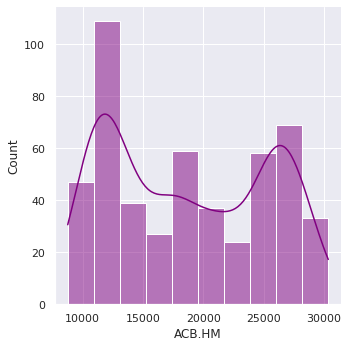

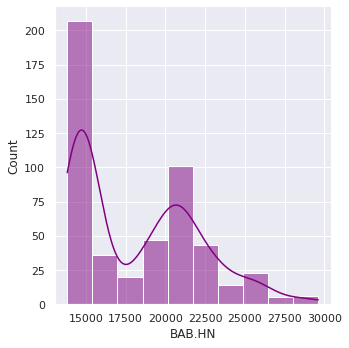

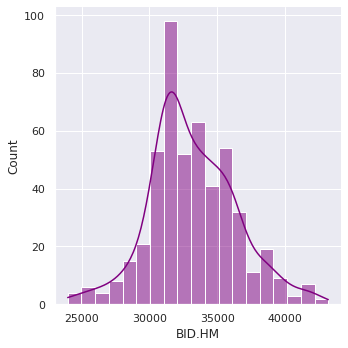

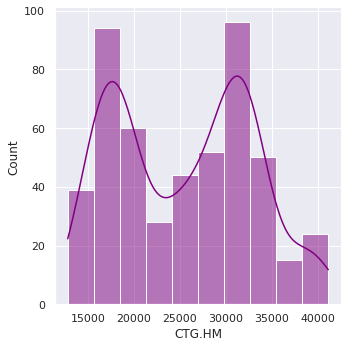

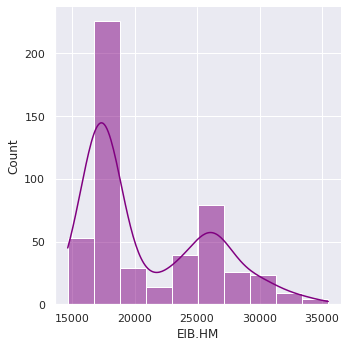

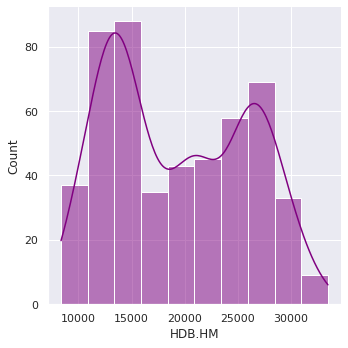

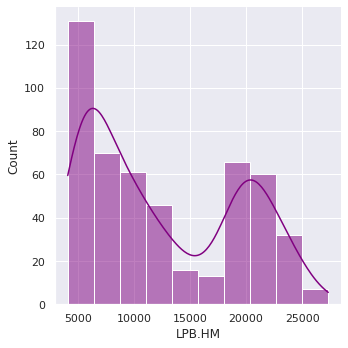

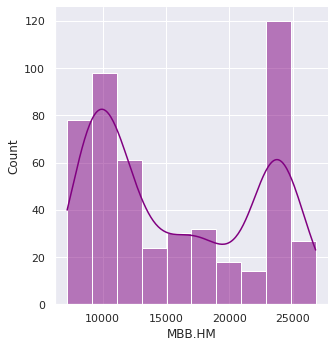

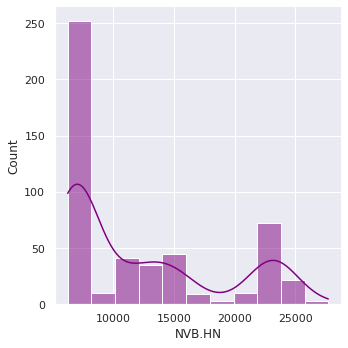

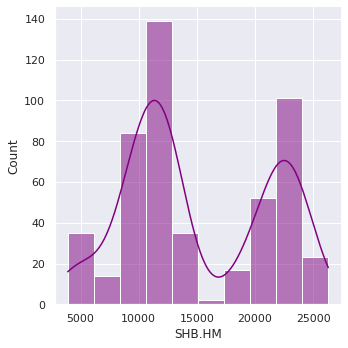

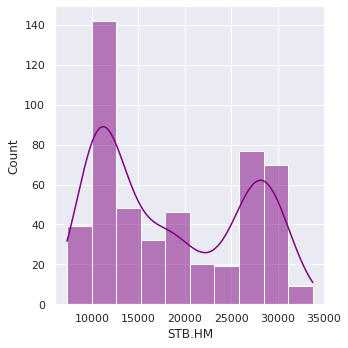

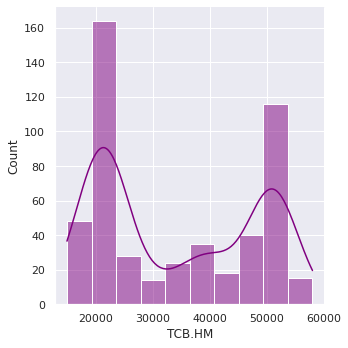

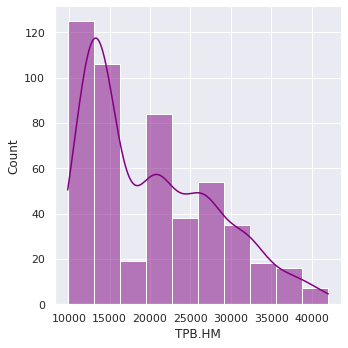

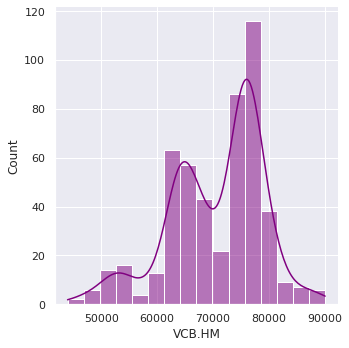

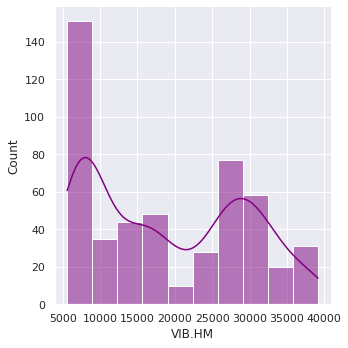

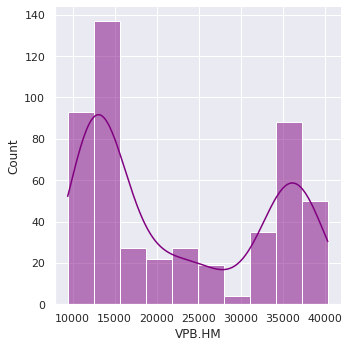

In [51]:
column_name = train_set.columns.tolist()
for column in column_name:
  sns.displot(train_set[column], kde=True, color='purple') 

## **Data Transformation** 

Lấy logarit tự nhiên của các cột giá trị.

* "the natural logarithm (predominantly used in mathematics and physics and in economics and business" (tham khảo: https://people.duke.edu/~rnau/411log.htm)
và https://sci-hub.se/10.2139/ssrn.1505506 

In [52]:
transformed_train_set = train_set.copy()
transformed_train_set

ACB.HM        BAB.HN        BID.HM        CTG.HM  EIB.HM  \
date_id                                                                      
2020-01-02  11323.080320  14464.222890  36500.061732  16030.227277   17700   
2020-01-03  11323.080320  14464.222890  36344.411148  15881.108884   17250   
2020-01-06  11076.926400  14384.310057  35643.983525  15918.388482   17500   
2020-01-07  11076.926400  14384.310057  36344.411148  16179.345670   17450   
2020-01-08  10880.003264  14384.310057  36655.712315  16142.066072   17300   
...                  ...           ...           ...           ...     ...   
2021-12-27  26520.000000  21018.520200  35300.000000  33400.000000   33350   
2021-12-28  26920.000000  20925.927600  35200.000000  33900.000000   35500   
2021-12-29  27040.000000  20833.335000  35200.000000  34150.000000   34200   
2021-12-30  27120.000000  20648.149800  35400.000000  33800.000000   33800   
2021-12-31  27600.000000  20925.927600  37100.000000  33900.000000   33700   

                  HDB.HM        LPB.HM        MBB.HM      NVB.HN  \
date_id                                                            
2020-01-02  13478.765170   5070.964489  11275.346913   7349.0152   
2020-01-03  13357.553253   5070.964489  11301.939712   7349.0152   
2020-01-06  13090.887036   4937.518055  11142.382916   7349.0152   
2020-01-07  12945.432735   4937.518055  11168.975715   7269.1346   
2020-01-08  12945.432735   4937.518055  11009.418919   7349.0152   
...                  ...           ...           ...         ...   
2021-12-27  28750.000000  19486.221150  23458.323950  23165.3740   
2021-12-28  30500.000000  19621.856100  23583.323900  24443.4636   
2021-12-29  30600.000000  20119.184250  23583.323900  23964.1800   
2021-12-30  30600.000000  20073.972600  23708.323850  23644.6576   
2021-12-31  30850.000000  20164.395900  24083.323700  25481.9114   

                  SHB.HM  STB.HM  TCB.HM        TPB.HM        VCB.HM  \
date_id                                                                
2020-01-02   4075.030941   10200   23800  12913.545095  69727.858228   
2020-01-03   3953.388226   10200   23650  13034.799040  69036.723069   
2020-01-06   3892.566869   10050   23050  12822.604637  67193.695979   
2020-01-07   3892.566869   10150   23200  12852.918123  67424.074365   
2020-01-08   3892.566869    9980   22750  12671.037206  66809.732002   
...                  ...     ...     ...           ...           ...   
2021-12-27  21500.000000   28100   48850  40750.000000  79800.000000   
2021-12-28  21500.000000   30050   49150  42050.000000  80000.000000   
2021-12-29  21500.000000   29500   49100  41350.000000  79500.000000   
2021-12-30  21400.000000   30500   49300  40750.000000  78400.000000   
2021-12-31  22300.000000   31500   50000  41050.000000  78800.000000   

                  VIB.HM        VPB.HM  
date_id                                 
2020-01-02   7760.143810  11416.790655  
2020-01-03   7716.052083  11333.456417  
2020-01-06   7583.776905  11083.453702  
2020-01-07   7583.776905  11305.678337  
2020-01-08   7451.501726  11166.787940  
...                  ...           ...  
2021-12-27  32000.011200  34350.000000  
2021-12-28  31777.788900  34550.000000  
2021-12-29  32666.678100  34750.000000  
2021-12-30  32777.789250  35400.000000  
2021-12-31  35037.049300  35800.000000  

[502 rows x 16 columns]

In [53]:
for column in transformed_train_set.columns.tolist():
  transformed_train_set[column] = transformed_train_set[column].astype(float)
  transformed_train_set[column] = np.log(transformed_train_set[column])

transformed_train_set

ACB.HM    BAB.HN     BID.HM     CTG.HM     EIB.HM     HDB.HM  \
date_id                                                                       
2020-01-02   9.334598  9.579433  10.505069   9.682231   9.781320   9.508871   
2020-01-03   9.334598  9.579433  10.500796   9.672886   9.755567   9.499837   
2020-01-06   9.312620  9.573893  10.481336   9.675230   9.769956   9.479672   
2020-01-07   9.312620  9.573893  10.500796   9.691491   9.767095   9.468498   
2020-01-08   9.294682  9.573893  10.509325   9.689184   9.758462   9.468498   
...               ...       ...        ...        ...        ...        ...   
2021-12-27  10.185654  9.953159  10.471638  10.416311  10.414813  10.266393   
2021-12-28  10.200625  9.948744  10.468801  10.431170  10.477288  10.325482   
2021-12-29  10.205073  9.944310  10.468801  10.438518  10.439981  10.328755   
2021-12-30  10.208027  9.935381  10.474467  10.428216  10.428216  10.328755   
2021-12-31  10.225571  9.948744  10.521372  10.431170  10.425253  10.336892   

              LPB.HM     MBB.HM     NVB.HN     SHB.HM     STB.HM     TCB.HM  \
date_id                                                                       
2020-01-02  8.531286   9.330374   8.902322   8.312634   9.230143  10.077441   
2020-01-03  8.531286   9.332730   8.902322   8.282328   9.230143  10.071118   
2020-01-06  8.504618   9.318511   8.902322   8.266824   9.215328  10.045421   
2020-01-07  8.504618   9.320895   8.891393   8.266824   9.225229  10.051908   
2020-01-08  8.504618   9.306506   8.902322   8.266824   9.208338  10.032320   
...              ...        ...        ...        ...        ...        ...   
2021-12-27  9.877463  10.062981  10.050414   9.975808  10.243525  10.796510   
2021-12-28  9.884399  10.068295  10.104118   9.975808  10.310618  10.802632   
2021-12-29  9.909429  10.068295  10.084315   9.975808  10.292146  10.801614   
2021-12-30  9.907179  10.073581  10.070892   9.971146  10.325482  10.805679   
2021-12-31  9.911674  10.089275  10.145724  10.012342  10.357743  10.819778   

               TPB.HM     VCB.HM     VIB.HM     VPB.HM  
date_id                                                 
2020-01-02   9.466032  11.152355   8.956756   9.342840  
2020-01-03   9.475378  11.142394   8.951058   9.335514  
2020-01-06   9.458965  11.115335   8.933767   9.313209  
2020-01-07   9.461326  11.118757   8.933767   9.333060  
2020-01-08   9.447074  11.109604   8.916171   9.320699  
...               ...        ...        ...        ...  
2021-12-27  10.615211  11.287279  10.373492  10.444357  
2021-12-28  10.646615  11.289782  10.366523  10.450163  
2021-12-29  10.629828  11.283512  10.394111  10.455935  
2021-12-30  10.615211  11.269579  10.397506  10.474467  
2021-12-31  10.622546  11.274668  10.464161  10.485703  

[502 rows x 16 columns]

In [54]:
fig = px.line(train_set, width=1000, height=600)
fig.show()

In [55]:
fig = px.line(transformed_train_set, width=1000, height=600)
fig.show()

### **Phân phối của dữ liệu đã transformed** 

In [56]:
fig = px.histogram(transformed_train_set,
                   marginal="box", # or violin, rug, 
                   width=1500, height=900)
fig.show()

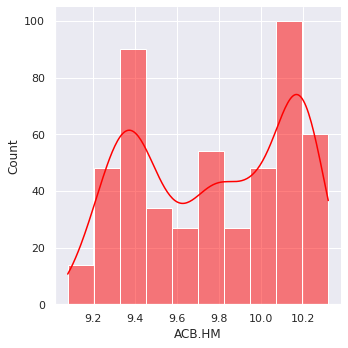

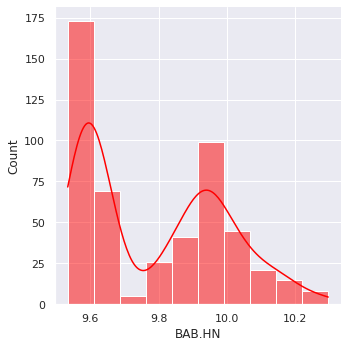

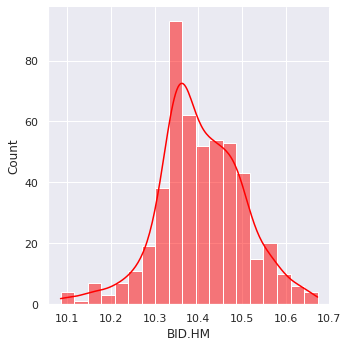

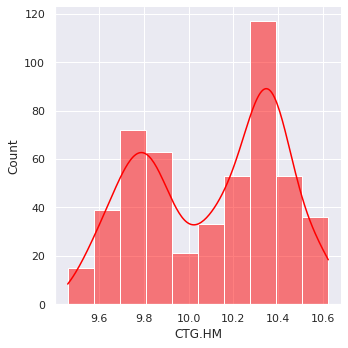

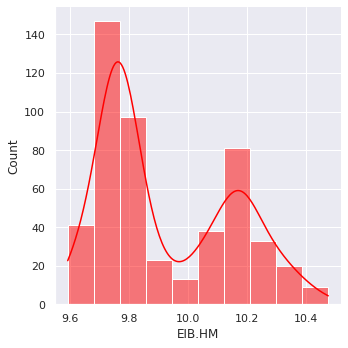

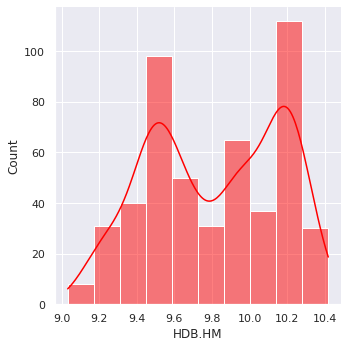

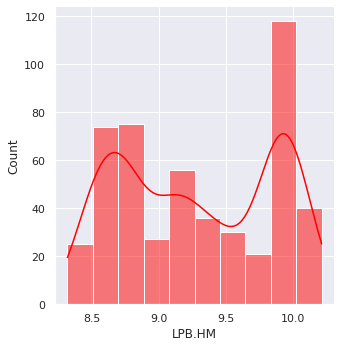

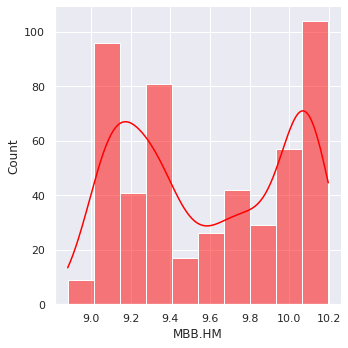

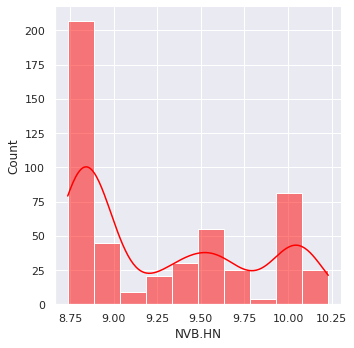

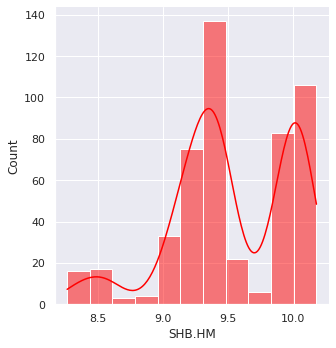

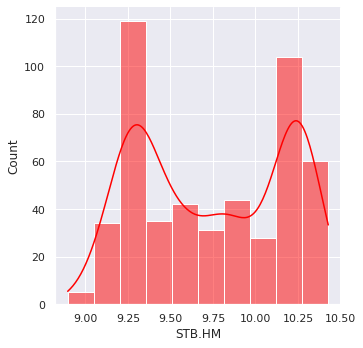

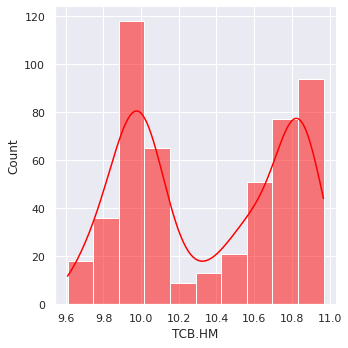

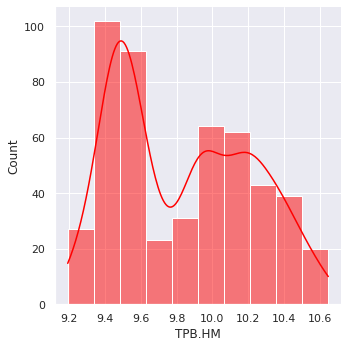

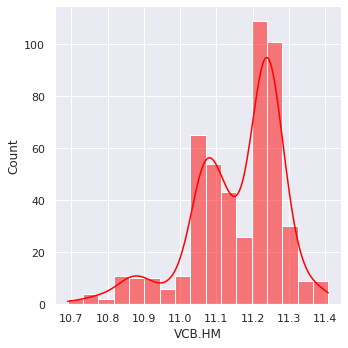

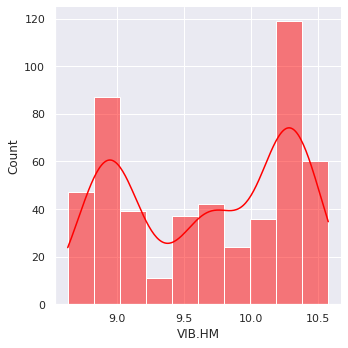

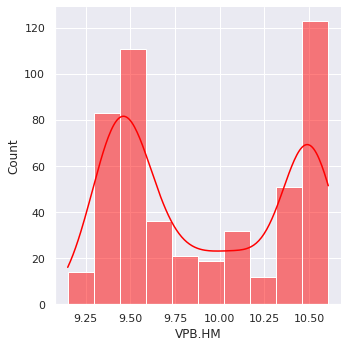

In [57]:
column_name = transformed_train_set.columns.tolist()
for column in column_name:
  sns.displot(transformed_train_set[column], kde=True, color='red') 

In [58]:
fig = px.line(transformed_train_set, width=1500, height=900)
fig.show()

#  **Pair Selection Method ALL PERIOD** 

## **Distance Approach Gatev Approach** 

Dựa trên phương pháp của Gatev et al 2006 sử dụng cummulative total return để 

1.   Mục danh sách
2.   Mục danh sách

normalize dữ liệu gốc, không sử dụng dữ liệu đã transform 

Tham khảo tại đây:

* 1. https://www.researchgate.net/publication/5217081_Pairs_Trading_Performance_of_a_Relative_Value_Arbitrage_Rule

* 2. http://uu.diva-portal.org/smash/get/diva2:1477748/FULLTEXT01.pdf 

* 3. https://www.allthesnippets.com/notes/finance/calculating_cumulative_returns_of_stocks_with_python_and_pandas.html 

**What Is a Return?**

A return, also known as a financial return, in its simplest terms, is the money made or lost on an investment over some period of time.

A return is a percentage defined as the change of price expressed as a fraction of the initial price.

Returns exhibit more attractive statistical properties than asset prices themselves. Therefore it also makes more statistical sense to analyze return data rather than price series.

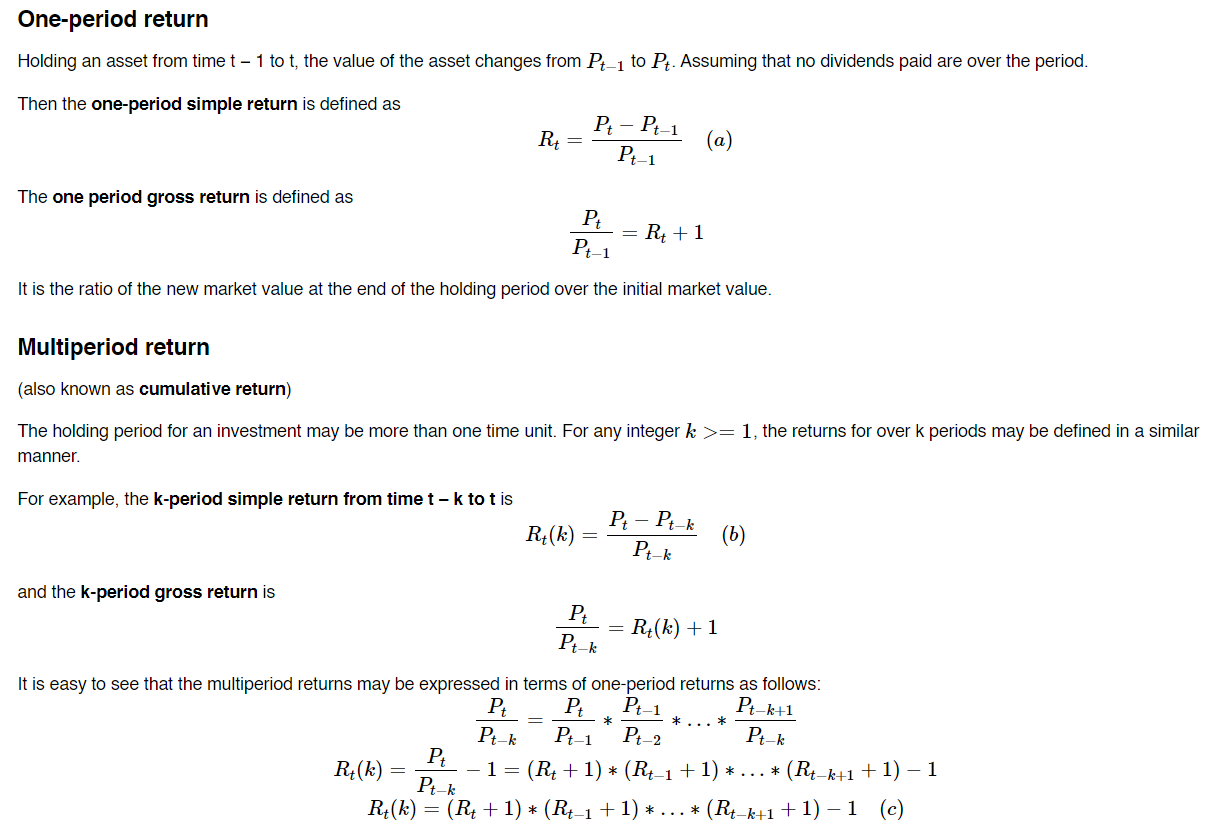

### **Normalize dữ liệu**

In [59]:
train_set 

ACB.HM        BAB.HN        BID.HM        CTG.HM  EIB.HM  \
date_id                                                                      
2020-01-02  11323.080320  14464.222890  36500.061732  16030.227277   17700   
2020-01-03  11323.080320  14464.222890  36344.411148  15881.108884   17250   
2020-01-06  11076.926400  14384.310057  35643.983525  15918.388482   17500   
2020-01-07  11076.926400  14384.310057  36344.411148  16179.345670   17450   
2020-01-08  10880.003264  14384.310057  36655.712315  16142.066072   17300   
...                  ...           ...           ...           ...     ...   
2021-12-27  26520.000000  21018.520200  35300.000000  33400.000000   33350   
2021-12-28  26920.000000  20925.927600  35200.000000  33900.000000   35500   
2021-12-29  27040.000000  20833.335000  35200.000000  34150.000000   34200   
2021-12-30  27120.000000  20648.149800  35400.000000  33800.000000   33800   
2021-12-31  27600.000000  20925.927600  37100.000000  33900.000000   33700   

                  HDB.HM        LPB.HM        MBB.HM      NVB.HN  \
date_id                                                            
2020-01-02  13478.765170   5070.964489  11275.346913   7349.0152   
2020-01-03  13357.553253   5070.964489  11301.939712   7349.0152   
2020-01-06  13090.887036   4937.518055  11142.382916   7349.0152   
2020-01-07  12945.432735   4937.518055  11168.975715   7269.1346   
2020-01-08  12945.432735   4937.518055  11009.418919   7349.0152   
...                  ...           ...           ...         ...   
2021-12-27  28750.000000  19486.221150  23458.323950  23165.3740   
2021-12-28  30500.000000  19621.856100  23583.323900  24443.4636   
2021-12-29  30600.000000  20119.184250  23583.323900  23964.1800   
2021-12-30  30600.000000  20073.972600  23708.323850  23644.6576   
2021-12-31  30850.000000  20164.395900  24083.323700  25481.9114   

                  SHB.HM  STB.HM  TCB.HM        TPB.HM        VCB.HM  \
date_id                                                                
2020-01-02   4075.030941   10200   23800  12913.545095  69727.858228   
2020-01-03   3953.388226   10200   23650  13034.799040  69036.723069   
2020-01-06   3892.566869   10050   23050  12822.604637  67193.695979   
2020-01-07   3892.566869   10150   23200  12852.918123  67424.074365   
2020-01-08   3892.566869    9980   22750  12671.037206  66809.732002   
...                  ...     ...     ...           ...           ...   
2021-12-27  21500.000000   28100   48850  40750.000000  79800.000000   
2021-12-28  21500.000000   30050   49150  42050.000000  80000.000000   
2021-12-29  21500.000000   29500   49100  41350.000000  79500.000000   
2021-12-30  21400.000000   30500   49300  40750.000000  78400.000000   
2021-12-31  22300.000000   31500   50000  41050.000000  78800.000000   

                  VIB.HM        VPB.HM  
date_id                                 
2020-01-02   7760.143810  11416.790655  
2020-01-03   7716.052083  11333.456417  
2020-01-06   7583.776905  11083.453702  
2020-01-07   7583.776905  11305.678337  
2020-01-08   7451.501726  11166.787940  
...                  ...           ...  
2021-12-27  32000.011200  34350.000000  
2021-12-28  31777.788900  34550.000000  
2021-12-29  32666.678100  34750.000000  
2021-12-30  32777.789250  35400.000000  
2021-12-31  35037.049300  35800.000000  

[502 rows x 16 columns]

### **Compute cumulative returns from prices** 

In [60]:
cum_return = (train_set.iloc[-1] - train_set.iloc[0]) / train_set.iloc[0]
cum_return

ACB.HM    1.437499
BAB.HN    0.446737
BID.HM    0.016437
CTG.HM    1.114755
EIB.HM    0.903955
HDB.HM    1.288785
LPB.HM    2.976442
MBB.HM    1.135928
NVB.HN    2.467391
SHB.HM    4.472351
STB.HM    2.088235
TCB.HM    1.100840
TPB.HM    2.178833
VCB.HM    0.130108
VIB.HM    3.515000
VPB.HM    2.135732
dtype: float64

These are the **rates of change** for each stock. We will multiple by 100 to get the numbers as percentage change.


In [61]:
cum_return * 100

ACB.HM    143.749927
BAB.HN     44.673708
BID.HM      1.643664
CTG.HM    111.475480
EIB.HM     90.395480
HDB.HM    128.878533
LPB.HM    297.644195
MBB.HM    113.592751
NVB.HN    246.739130
SHB.HM    447.235109
STB.HM    208.823529
TCB.HM    110.084034
TPB.HM    217.883274
VCB.HM     13.010785
VIB.HM    351.500000
VPB.HM    213.573237
dtype: float64

### **Compute cumulative returns from simple daily returns** 

*We will use formula (a) and pandas built in function pct_change to compute the simple returns for each day, each stock in our dataset.*

In [62]:
# compute daily returns using pandas pct_change()
df_daily_returns = train_set.pct_change()
# skip first row with NA 
df_daily_returns = df_daily_returns[1:]
df_daily_returns

ACB.HM    BAB.HN    BID.HM    CTG.HM    EIB.HM    HDB.HM  \
date_id                                                                  
2020-01-03  0.000000  0.000000 -0.004264 -0.009302 -0.025424 -0.008993   
2020-01-06 -0.021739 -0.005525 -0.019272  0.002347  0.014493 -0.019964   
2020-01-07  0.000000  0.000000  0.019651  0.016393 -0.002857 -0.011111   
2020-01-08 -0.017778  0.000000  0.008565 -0.002304 -0.008596  0.000000   
2020-01-09  0.013575  0.005556  0.054140  0.036952  0.008671  0.029963   
...              ...       ...       ...       ...       ...       ...   
2021-12-27  0.004545  0.004425  0.008571  0.015198  0.068910  0.001742   
2021-12-28  0.015083 -0.004405 -0.002833  0.014970  0.064468  0.060870   
2021-12-29  0.004458 -0.004425  0.000000  0.007375 -0.036620  0.003279   
2021-12-30  0.002959 -0.008889  0.005682 -0.010249 -0.011696  0.000000   
2021-12-31  0.017699  0.013453  0.048023  0.002959 -0.002959  0.008170   

              LPB.HM    MBB.HM    NVB.HN    SHB.HM    STB.HM    TCB.HM  \
date_id                                                                  
2020-01-03  0.000000  0.002358  0.000000 -0.029851  0.000000 -0.006303   
2020-01-06 -0.026316 -0.014118  0.000000 -0.015385 -0.014706 -0.025370   
2020-01-07  0.000000  0.002387 -0.010870  0.000000  0.009950  0.006508   
2020-01-08  0.000000 -0.014286  0.010989  0.000000 -0.016749 -0.019397   
2020-01-09  0.000000  0.016908  0.010870  0.015625  0.017034  0.013187   
...              ...       ...       ...       ...       ...       ...   
2021-12-27 -0.006912  0.000000 -0.006849  0.000000 -0.003546 -0.001022   
2021-12-28  0.006961  0.005329  0.055172  0.000000  0.069395  0.006141   
2021-12-29  0.025346  0.000000 -0.019608  0.000000 -0.018303 -0.001017   
2021-12-30 -0.002247  0.005300 -0.013333 -0.004651  0.033898  0.004073   
2021-12-31  0.004505  0.015817  0.077703  0.042056  0.032787  0.014199   

              TPB.HM    VCB.HM    VIB.HM    VPB.HM  
date_id                                             
2020-01-03  0.009390 -0.009912 -0.005682 -0.007299  
2020-01-06 -0.016279 -0.026696 -0.017143 -0.022059  
2020-01-07  0.002364  0.003429  0.000000  0.020050  
2020-01-08 -0.014151 -0.009112 -0.017442 -0.012285  
2020-01-09  0.009569  0.019540  0.005917  0.032338  
...              ...       ...       ...       ...  
2021-12-27  0.038217  0.016561 -0.010309  0.002920  
2021-12-28  0.031902  0.002506 -0.006944  0.005822  
2021-12-29 -0.016647 -0.006250  0.027972  0.005789  
2021-12-30 -0.014510 -0.013836  0.003401  0.018705  
2021-12-31  0.007362  0.005102  0.068927  0.011299  

[501 rows x 16 columns]

*And finally, the formula (c) on the dataframe of daily returns using pandas' cumprod function.*

In [63]:
# Calculate the cumulative daily returns
df_cum_daily_returns = (1 + df_daily_returns).cumprod() - 1
# df_cum_daily_returns = df_cum_daily_returns.reset_index()
df_cum_daily_returns

ACB.HM    BAB.HN    BID.HM    CTG.HM    EIB.HM    HDB.HM  \
date_id                                                                  
2020-01-03  0.000000  0.000000 -0.004264 -0.009302 -0.025424 -0.008993   
2020-01-06 -0.021739 -0.005525 -0.023454 -0.006977 -0.011299 -0.028777   
2020-01-07 -0.021739 -0.005525 -0.004264  0.009302 -0.014124 -0.039568   
2020-01-08 -0.039130 -0.005525  0.004264  0.006977 -0.022599 -0.039568   
2020-01-09 -0.026087  0.000000  0.058635  0.044186 -0.014124 -0.010791   
...              ...       ...       ...       ...       ...       ...   
2021-12-27  1.342119  0.453139 -0.032878  1.083564  0.884181  1.132985   
2021-12-28  1.377445  0.446737 -0.035618  1.114755  1.005650  1.262819   
2021-12-29  1.388043  0.440336 -0.035618  1.130350  0.932203  1.270238   
2021-12-30  1.395108  0.427533 -0.030139  1.108517  0.909605  1.270238   
2021-12-31  1.437499  0.446737  0.016437  1.114755  0.903955  1.288785   

              LPB.HM    MBB.HM    NVB.HN    SHB.HM    STB.HM    TCB.HM  \
date_id                                                                  
2020-01-03  0.000000  0.002358  0.000000 -0.029851  0.000000 -0.006303   
2020-01-06 -0.026316 -0.011792  0.000000 -0.044776 -0.014706 -0.031513   
2020-01-07 -0.026316 -0.009434 -0.010870 -0.044776 -0.004902 -0.025210   
2020-01-08 -0.026316 -0.023585  0.000000 -0.044776 -0.021569 -0.044118   
2020-01-09 -0.026316 -0.007075  0.010870 -0.029851 -0.004902 -0.031513   
...              ...       ...       ...       ...       ...       ...   
2021-12-27  2.842705  1.080497  2.152174  4.276034  1.754902  1.052521   
2021-12-28  2.869452  1.091583  2.326087  4.276034  1.946078  1.065126   
2021-12-29  2.967526  1.091583  2.260870  4.276034  1.892157  1.063025   
2021-12-30  2.958610  1.102669  2.217391  4.251494  1.990196  1.071429   
2021-12-31  2.976442  1.135928  2.467391  4.472351  2.088235  1.100840   

              TPB.HM    VCB.HM    VIB.HM    VPB.HM  
date_id                                             
2020-01-03  0.009390 -0.009912 -0.005682 -0.007299  
2020-01-06 -0.007042 -0.036344 -0.022727 -0.029197  
2020-01-07 -0.004695 -0.033040 -0.022727 -0.009732  
2020-01-08 -0.018779 -0.041850 -0.039773 -0.021898  
2020-01-09 -0.009390 -0.023128 -0.034091  0.009732  
...              ...       ...       ...       ...  
2021-12-27  2.155601  0.144449  3.123636  2.008726  
2021-12-28  2.256271  0.147318  3.095000  2.026245  
2021-12-29  2.202064  0.140147  3.209545  2.043763  
2021-12-30  2.155601  0.124371  3.223864  2.100696  
2021-12-31  2.178833  0.130108  3.515000  2.135732  

[501 rows x 16 columns]

*Last record of the dataframe multiplied by 100 is giving us the percentage change of the stock prices for our entire period*

In [64]:
cum_return_entire_period = df_cum_daily_returns.tail(1)
cum_return_entire_period * 100

ACB.HM     BAB.HN    BID.HM     CTG.HM    EIB.HM      HDB.HM  \
date_id                                                                        
2021-12-31  143.749927  44.673708  1.643664  111.47548  90.39548  128.878533   

                LPB.HM      MBB.HM     NVB.HN      SHB.HM      STB.HM  \
date_id                                                                 
2021-12-31  297.644195  113.592751  246.73913  447.235109  208.823529   

                TCB.HM      TPB.HM     VCB.HM  VIB.HM      VPB.HM  
date_id                                                            
2021-12-31  110.084034  217.883274  13.010785   351.5  213.573237

**Visualize the returns**

Visualize simple daily return

In [65]:
fig = px.line(df_daily_returns*100,
              title='Performance - Daily Simple Returns', 
              width=1000, height=600,
              )
fig.update_layout(yaxis_title="Daily Returns (%)")
fig.show()

Visualize cummulative return

In [66]:
fig = px.line(df_cum_daily_returns*100,
              title='Performance - Daily Cumulative Returns', 
              width=1000, height=600,
              )
fig.update_layout(yaxis_title="Daily Cumulative returns (%)")
fig.show()

In [67]:
df_cum_daily_returns_pct = df_cum_daily_returns.copy()
df_cum_daily_returns_pct = df_cum_daily_returns_pct*100
df_cum_daily_returns_pct

ACB.HM     BAB.HN    BID.HM      CTG.HM      EIB.HM  \
date_id                                                               
2020-01-03    0.000000   0.000000 -0.426439   -0.930233   -2.542373   
2020-01-06   -2.173913  -0.552486 -2.345416   -0.697674   -1.129944   
2020-01-07   -2.173913  -0.552486 -0.426439    0.930233   -1.412429   
2020-01-08   -3.913043  -0.552486  0.426439    0.697674   -2.259887   
2020-01-09   -2.608696   0.000000  5.863539    4.418605   -1.412429   
...                ...        ...       ...         ...         ...   
2021-12-27  134.211886  45.313857 -3.287835  108.356372   88.418079   
2021-12-28  137.744494  44.673708 -3.561807  111.475480  100.564972   
2021-12-29  138.804276  44.033559 -3.561807  113.035033   93.220339   
2021-12-30  139.510798  42.753261 -3.013863  110.851658   90.960452   
2021-12-31  143.749927  44.673708  1.643664  111.475480   90.395480   

                HDB.HM      LPB.HM      MBB.HM      NVB.HN      SHB.HM  \
date_id                                                                  
2020-01-03   -0.899281    0.000000    0.235849    0.000000   -2.985075   
2020-01-06   -2.877698   -2.631579   -1.179245    0.000000   -4.477612   
2020-01-07   -3.956835   -2.631579   -0.943396   -1.086957   -4.477612   
2020-01-08   -3.956835   -2.631579   -2.358491    0.000000   -4.477612   
2020-01-09   -1.079137   -2.631579   -0.707547    1.086957   -2.985075   
...                ...         ...         ...         ...         ...   
2021-12-27  113.298471  284.270511  108.049687  215.217391  427.603356   
2021-12-28  126.281856  286.945248  109.158300  232.608696  427.603356   
2021-12-29  127.023764  296.752616  109.158300  226.086957  427.603356   
2021-12-30  127.023764  295.861037  110.266913  221.739130  425.149387   
2021-12-31  128.878533  297.644195  113.592751  246.739130  447.235109   

                STB.HM      TCB.HM      TPB.HM     VCB.HM      VIB.HM  \
date_id                                                                 
2020-01-03    0.000000   -0.630252    0.938967  -0.991189   -0.568182   
2020-01-06   -1.470588   -3.151261   -0.704225  -3.634361   -2.272727   
2020-01-07   -0.490196   -2.521008   -0.469484  -3.303965   -2.272727   
2020-01-08   -2.156863   -4.411765   -1.877934  -4.185022   -3.977273   
2020-01-09   -0.490196   -3.151261   -0.938967  -2.312775   -3.409091   
...                ...         ...         ...        ...         ...   
2021-12-27  175.490196  105.252101  215.560132  14.444932  312.363636   
2021-12-28  194.607843  106.512605  225.627081  14.731761  309.500000   
2021-12-29  189.215686  106.302521  220.206417  14.014688  320.954545   
2021-12-30  199.019608  107.142857  215.560132  12.437126  322.386364   
2021-12-31  208.823529  110.084034  217.883274  13.010785  351.500000   

                VPB.HM  
date_id                 
2020-01-03   -0.729927  
2020-01-06   -2.919708  
2020-01-07   -0.973236  
2020-01-08   -2.189781  
2020-01-09    0.973236  
...                ...  
2021-12-27  200.872645  
2021-12-28  202.624451  
2021-12-29  204.376256  
2021-12-30  210.069625  
2021-12-31  213.573237  

[501 rows x 16 columns]

**Tính khoảng cách Euclide dựa trên Cummulative Return** 

In [68]:
# lấy tổ hợp chập 2 các phần tử trong danh sách các cột 
col_combi = list(itertools.combinations(df_cum_daily_returns_pct.columns.tolist(), 2))

In [110]:
len(col_combi)

120

In [69]:
#heatmap khoảng cách của các cặp
col =  df_cum_daily_returns_pct.columns.tolist()
dist_gatev = np.zeros((16, 16))
keys = df_cum_daily_returns_pct.keys()
for i in range(16):
      for j in range(i+1, 16):
          S1 = df_cum_daily_returns_pct[keys[i]]
          S2 = df_cum_daily_returns_pct[keys[j]]
          dist = round(np.linalg.norm(S1 - S2),1)
          dist_gatev[i,j] = dist

fig = px.imshow(dist_gatev,
                labels=dict(x="Stock", y="Stock", color="Distance"),
                x=col,
                y=col,  color_continuous_scale='reds',
               width=1000, height=600)
fig.update_xaxes(side="top")
fig.show()

In [70]:
# tính khoảng cách euclide của từng cặp 
value_list = []
for col in col_combi:
  dist = round(np.linalg.norm(df_cum_daily_returns_pct[col[0]] - df_cum_daily_returns_pct[col[1]]),1)
  value_list.append(dist)

# chọn ra 10 cặp có giá trị khoảng cách nhỏ nhất 
top10_smallest = nsmallest(10, value_list)
smallest_pair_gatev = []

for col in col_combi:
  dist = round(np.linalg.norm(df_cum_daily_returns_pct[col[0]] - df_cum_daily_returns_pct[col[1]]),1)
  if dist in top10_smallest:
    pair = [col[0], col[1]]
    smallest_pair_gatev.append(pair)
    print(f"Khoảng cách Euclide của {col[0]} và {col[1]}: {dist}")

for i in smallest_pair_gatev:
  print(i)
print(len(smallest_pair_gatev))

Khoảng cách Euclide của ACB.HM và CTG.HM: 426.0
Khoảng cách Euclide của ACB.HM và HDB.HM: 563.9
Khoảng cách Euclide của ACB.HM và TCB.HM: 564.7
Khoảng cách Euclide của BAB.HN và EIB.HM: 458.8
Khoảng cách Euclide của BID.HM và VCB.HM: 312.4
Khoảng cách Euclide của CTG.HM và HDB.HM: 490.9
Khoảng cách Euclide của HDB.HM và MBB.HM: 300.3
Khoảng cách Euclide của HDB.HM và TCB.HM: 345.0
Khoảng cách Euclide của HDB.HM và TPB.HM: 551.9
Khoảng cách Euclide của MBB.HM và TCB.HM: 179.1
['ACB.HM', 'CTG.HM']
['ACB.HM', 'HDB.HM']
['ACB.HM', 'TCB.HM']
['BAB.HN', 'EIB.HM']
['BID.HM', 'VCB.HM']
['CTG.HM', 'HDB.HM']
['HDB.HM', 'MBB.HM']
['HDB.HM', 'TCB.HM']
['HDB.HM', 'TPB.HM']
['MBB.HM', 'TCB.HM']
10


## **Distance Approach MinMax Normalization**

In [71]:
# df_normalized = pd.DataFrame()
# for col in imputed_data.columns.tolist():
#   normalized=(imputed_data[col]-imputed_data[col].min())/(imputed_data[col].max()-imputed_data[col].min())
#   df_normalized[col] = pd.Series(normalized.values)


In [72]:
# df_normalized

In [73]:
# fig = px.line(df_normalized,
#               title='Data Min Max Normalization', 
#               width=1400, height=800,
#               )
# fig.update_layout(yaxis_title="Min Max Normalized Price")
# fig.show()

In [74]:
# #heatmap khoảng cách của các cặp 
# col = df_normalized.columns.tolist()
# dist_minmax = np.zeros((16, 16))
# keys = df_normalized.keys()
# for i in range(16):
#       for j in range(i+1, 16):
#           S1 = df_normalized[keys[i]]
#           S2 = df_normalized[keys[j]]
#           dist = np.linalg.norm(S1 - S2)
#           dist_minmax[i,j] = dist

# fig = px.imshow(dist_minmax,
#                 labels=dict(x="Stock", y="Stock", color="Distance"),
#                 x=col,
#                 y=col,  color_continuous_scale='blues',
#                width=1400, height=900)
# fig.update_xaxes(side="top")
# fig.show()

In [75]:
# col_combi_minmax = list(itertools.combinations(df_normalized.columns.tolist(), 2))
# # tính khoảng cách euclide của từng cặp 
# value_list_minmax = []
# for col in col_combi_minmax:
#   dist = np.linalg.norm(df_normalized[col[0]] - df_normalized[col[1]])
#   value_list_minmax.append(dist)

# # chọn ra 10 cặp có giá trị khoảng cách nhỏ nhất 
# top10_smallest_minmax = nsmallest(10, value_list_minmax)
# smallest_pair_minmax = []

# for col in col_combi_minmax:
#   dist = np.linalg.norm(df_normalized[col[0]] - df_normalized[col[1]])
#   if dist in top10_smallest_minmax:
#     pair = [col[0], col[1]]
#     smallest_pair_minmax.append(pair)
#     print(f"Khoảng cách Euclide của {col[0]} và {col[1]}: {dist}")

# for i in smallest_pair_minmax:
#   print(i)
# print(len(smallest_pair_minmax))

#### **Tính zero crossing** 

In [76]:
# #heatmap khoảng cách của các cặp 
# col = df_normalized.columns.tolist()
# crossing_minmax = np.zeros((16, 16))
# keys = df_normalized.keys()
# for i in range(16):
#       for j in range(i+1, 16):
#           S1 = df_normalized[keys[i]]
#           S2 = df_normalized[keys[j]]
#           spread = (S1 - S2).to_numpy()
#           zero_crossings = ((spread[:-1] * spread[1:]) < 0).sum()
#           crossing_minmax[i,j] = zero_crossings

# fig = px.imshow(crossing_minmax,
#                 labels=dict(x="Stock", y="Stock", color="Zero crossings"),
#                 x=col,
#                 y=col,  color_continuous_scale='algae',
#                width=1400, height=900)
# fig.update_xaxes(side="top")
# fig.show()

In [77]:
# crossing_list = []
# for col in col_combi_minmax:
#   spread = (df_normalized[col[0]] - df_normalized[col[1]]).to_numpy()
#   zero_crossings = ((spread[:-1] * spread[1:]) < 0).sum()
#   crossing_list.append(zero_crossings)

# # chọn ra 10 cặp có zero crossing cao nhất 
# top10_highest_crossing = nlargest(10, crossing_list)
# highest_crossing_pair = []

# for col in col_combi_minmax:
#   spread = (df_normalized[col[0]] - df_normalized[col[1]]).to_numpy()
#   zero_crossings = ((spread[:-1] * spread[1:]) < 0).sum()
#   if zero_crossings in top10_highest_crossing:
#     pair = [col[0], col[1]]
#     highest_crossing_pair.append(pair)
#     print(f"Số lượng zero crossing của {col[0]} và {col[1]}: {dist}")

# for i in highest_crossing_pair:
#   print(i)
# print(len(highest_crossing_pair))

## **Cointegration Approach** 

Sử dụng dạng log tự nhiên của price dể test tính đồng liên kết 

Tham khảo tại đây:

* 1. https://www.researchgate.net/publication/5217081_Pairs_Trading_Performance_of_a_Relative_Value_Arbitrage_Rule

* 2. http://uu.diva-portal.org/smash/get/diva2:1477748/FULLTEXT01.pdf 

### **Pretesting tính Stationary** 

In [78]:
transformed_train_set

ACB.HM    BAB.HN     BID.HM     CTG.HM     EIB.HM     HDB.HM  \
date_id                                                                       
2020-01-02   9.334598  9.579433  10.505069   9.682231   9.781320   9.508871   
2020-01-03   9.334598  9.579433  10.500796   9.672886   9.755567   9.499837   
2020-01-06   9.312620  9.573893  10.481336   9.675230   9.769956   9.479672   
2020-01-07   9.312620  9.573893  10.500796   9.691491   9.767095   9.468498   
2020-01-08   9.294682  9.573893  10.509325   9.689184   9.758462   9.468498   
...               ...       ...        ...        ...        ...        ...   
2021-12-27  10.185654  9.953159  10.471638  10.416311  10.414813  10.266393   
2021-12-28  10.200625  9.948744  10.468801  10.431170  10.477288  10.325482   
2021-12-29  10.205073  9.944310  10.468801  10.438518  10.439981  10.328755   
2021-12-30  10.208027  9.935381  10.474467  10.428216  10.428216  10.328755   
2021-12-31  10.225571  9.948744  10.521372  10.431170  10.425253  10.336892   

              LPB.HM     MBB.HM     NVB.HN     SHB.HM     STB.HM     TCB.HM  \
date_id                                                                       
2020-01-02  8.531286   9.330374   8.902322   8.312634   9.230143  10.077441   
2020-01-03  8.531286   9.332730   8.902322   8.282328   9.230143  10.071118   
2020-01-06  8.504618   9.318511   8.902322   8.266824   9.215328  10.045421   
2020-01-07  8.504618   9.320895   8.891393   8.266824   9.225229  10.051908   
2020-01-08  8.504618   9.306506   8.902322   8.266824   9.208338  10.032320   
...              ...        ...        ...        ...        ...        ...   
2021-12-27  9.877463  10.062981  10.050414   9.975808  10.243525  10.796510   
2021-12-28  9.884399  10.068295  10.104118   9.975808  10.310618  10.802632   
2021-12-29  9.909429  10.068295  10.084315   9.975808  10.292146  10.801614   
2021-12-30  9.907179  10.073581  10.070892   9.971146  10.325482  10.805679   
2021-12-31  9.911674  10.089275  10.145724  10.012342  10.357743  10.819778   

               TPB.HM     VCB.HM     VIB.HM     VPB.HM  
date_id                                                 
2020-01-02   9.466032  11.152355   8.956756   9.342840  
2020-01-03   9.475378  11.142394   8.951058   9.335514  
2020-01-06   9.458965  11.115335   8.933767   9.313209  
2020-01-07   9.461326  11.118757   8.933767   9.333060  
2020-01-08   9.447074  11.109604   8.916171   9.320699  
...               ...        ...        ...        ...  
2021-12-27  10.615211  11.287279  10.373492  10.444357  
2021-12-28  10.646615  11.289782  10.366523  10.450163  
2021-12-29  10.629828  11.283512  10.394111  10.455935  
2021-12-30  10.615211  11.269579  10.397506  10.474467  
2021-12-31  10.622546  11.274668  10.464161  10.485703  

[502 rows x 16 columns]

In [79]:
#Ho: It is have unit root, non-stationary
#H1: It is stationary

def adfuller_test(price, col):
    result = adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    # labels = ['p-value']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print(f"{col}: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary \n")
    else:
        print(f"{col}: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")

In [80]:
# adf test các stock chưa lấy sai phân
for col in transformed_train_set.columns.tolist():
  adfuller_test(transformed_train_set[col], col)

ADF Test Statistic : -0.6606562799623796
p-value : 0.856679006423727
#Lags Used : 0
Number of Observations Used : 501
ACB.HM: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

ADF Test Statistic : -1.5738116821183135
p-value : 0.49673400235441645
#Lags Used : 4
Number of Observations Used : 497
BAB.HN: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

ADF Test Statistic : -3.277324690141936
p-value : 0.015922991752061084
#Lags Used : 5
Number of Observations Used : 496
BID.HM: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 

ADF Test Statistic : -1.0855417900620867
p-value : 0.7208030985925922
#Lags Used : 5
Number of Observations Used : 496
CTG.HM: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

ADF Test Statistic : -0.3041078115977096
p-value : 0.9249205248723

In [81]:
# adf test các stock lấy sai phân 1 lần 
for col in transformed_train_set.columns.tolist():
  adfuller_test(transformed_train_set[col].diff().dropna(), col)

ADF Test Statistic : -23.507806527819383
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 500
ACB.HM: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 

ADF Test Statistic : -9.881861661719208
p-value : 3.7515976067035615e-17
#Lags Used : 3
Number of Observations Used : 497
BAB.HN: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 

ADF Test Statistic : -6.079646326720062
p-value : 1.1000490975232302e-07
#Lags Used : 12
Number of Observations Used : 488
BID.HM: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 

ADF Test Statistic : -8.98251172423077
p-value : 7.245924164677105e-15
#Lags Used : 4
Number of Observations Used : 496
CTG.HM: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 

ADF Test Statistic : -2

Tất cả các stock trừ BID.HM đều tích hợp bậc 1. BID.HM là I(0) 

In [82]:
egjj_transformed_train_set = transformed_train_set.copy()
egjj_transformed_train_set.drop(columns=['BID.HM'], axis=1, inplace=True)
egjj_transformed_train_set

ACB.HM    BAB.HN     CTG.HM     EIB.HM     HDB.HM    LPB.HM  \
date_id                                                                      
2020-01-02   9.334598  9.579433   9.682231   9.781320   9.508871  8.531286   
2020-01-03   9.334598  9.579433   9.672886   9.755567   9.499837  8.531286   
2020-01-06   9.312620  9.573893   9.675230   9.769956   9.479672  8.504618   
2020-01-07   9.312620  9.573893   9.691491   9.767095   9.468498  8.504618   
2020-01-08   9.294682  9.573893   9.689184   9.758462   9.468498  8.504618   
...               ...       ...        ...        ...        ...       ...   
2021-12-27  10.185654  9.953159  10.416311  10.414813  10.266393  9.877463   
2021-12-28  10.200625  9.948744  10.431170  10.477288  10.325482  9.884399   
2021-12-29  10.205073  9.944310  10.438518  10.439981  10.328755  9.909429   
2021-12-30  10.208027  9.935381  10.428216  10.428216  10.328755  9.907179   
2021-12-31  10.225571  9.948744  10.431170  10.425253  10.336892  9.911674   

               MBB.HM     NVB.HN     SHB.HM     STB.HM     TCB.HM     TPB.HM  \
date_id                                                                        
2020-01-02   9.330374   8.902322   8.312634   9.230143  10.077441   9.466032   
2020-01-03   9.332730   8.902322   8.282328   9.230143  10.071118   9.475378   
2020-01-06   9.318511   8.902322   8.266824   9.215328  10.045421   9.458965   
2020-01-07   9.320895   8.891393   8.266824   9.225229  10.051908   9.461326   
2020-01-08   9.306506   8.902322   8.266824   9.208338  10.032320   9.447074   
...               ...        ...        ...        ...        ...        ...   
2021-12-27  10.062981  10.050414   9.975808  10.243525  10.796510  10.615211   
2021-12-28  10.068295  10.104118   9.975808  10.310618  10.802632  10.646615   
2021-12-29  10.068295  10.084315   9.975808  10.292146  10.801614  10.629828   
2021-12-30  10.073581  10.070892   9.971146  10.325482  10.805679  10.615211   
2021-12-31  10.089275  10.145724  10.012342  10.357743  10.819778  10.622546   

               VCB.HM     VIB.HM     VPB.HM  
date_id                                      
2020-01-02  11.152355   8.956756   9.342840  
2020-01-03  11.142394   8.951058   9.335514  
2020-01-06  11.115335   8.933767   9.313209  
2020-01-07  11.118757   8.933767   9.333060  
2020-01-08  11.109604   8.916171   9.320699  
...               ...        ...        ...  
2021-12-27  11.287279  10.373492  10.444357  
2021-12-28  11.289782  10.366523  10.450163  
2021-12-29  11.283512  10.394111  10.455935  
2021-12-30  11.269579  10.397506  10.474467  
2021-12-31  11.274668  10.464161  10.485703  

[502 rows x 15 columns]

### **Phương pháp Engle - Granger** 

In [83]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append([keys[i], keys[j]])
    return score_matrix, pvalue_matrix, pairs

In [84]:
def find_cointegrated_pairs_swap(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S2, S1)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append([keys[i], keys[j]])
    return score_matrix, pvalue_matrix, pairs

['ACB.HM', 'HDB.HM']
['ACB.HM', 'LPB.HM']
['ACB.HM', 'STB.HM']
['BAB.HN', 'CTG.HM']
['BAB.HN', 'TCB.HM']
['CTG.HM', 'VCB.HM']
['CTG.HM', 'VIB.HM']
['HDB.HM', 'STB.HM']
['LPB.HM', 'STB.HM']
['MBB.HM', 'STB.HM']
['MBB.HM', 'VPB.HM']
['SHB.HM', 'STB.HM']
['SHB.HM', 'TCB.HM']
['SHB.HM', 'TPB.HM']
['SHB.HM', 'VIB.HM']
['SHB.HM', 'VPB.HM']
['TCB.HM', 'VPB.HM']
['VCB.HM', 'VIB.HM']


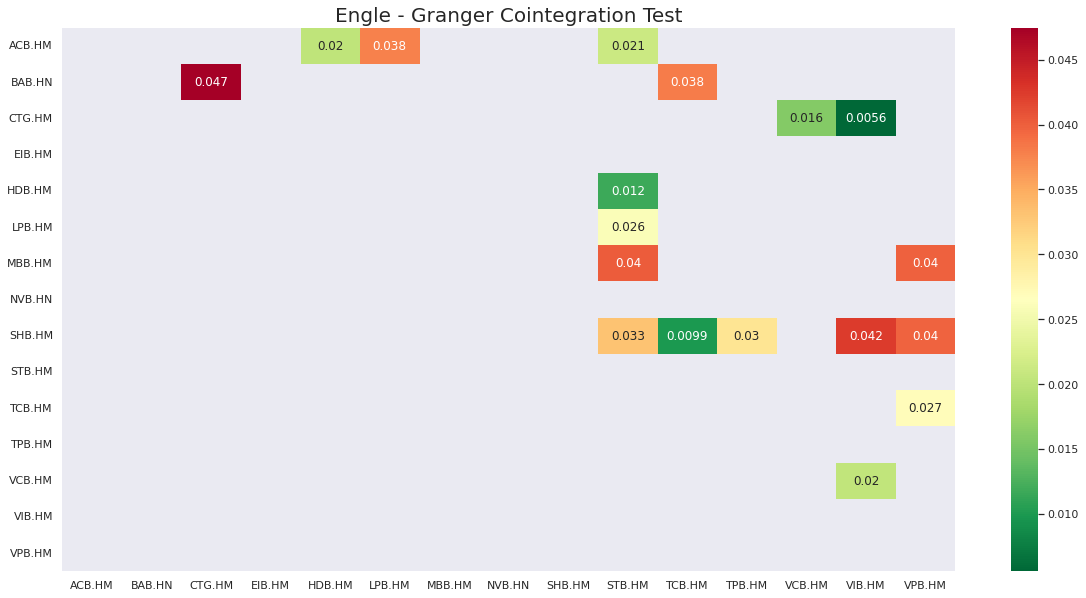

In [85]:
tickers = egjj_transformed_train_set.columns.tolist()

scores, pvalues, pairs = find_cointegrated_pairs(egjj_transformed_train_set)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05), annot=True
                )

plt.title('Engle - Granger Cointegration Test', fontsize = 20)
for element in pairs:
  print(element)

['ACB.HM', 'HDB.HM']
['ACB.HM', 'LPB.HM']
['ACB.HM', 'SHB.HM']
['ACB.HM', 'STB.HM']
['CTG.HM', 'SHB.HM']
['CTG.HM', 'VCB.HM']
['CTG.HM', 'VIB.HM']
['EIB.HM', 'SHB.HM']
['HDB.HM', 'SHB.HM']
['HDB.HM', 'STB.HM']
['LPB.HM', 'SHB.HM']
['LPB.HM', 'STB.HM']
['MBB.HM', 'SHB.HM']
['MBB.HM', 'STB.HM']
['MBB.HM', 'VPB.HM']
['NVB.HN', 'SHB.HM']
['TCB.HM', 'VPB.HM']


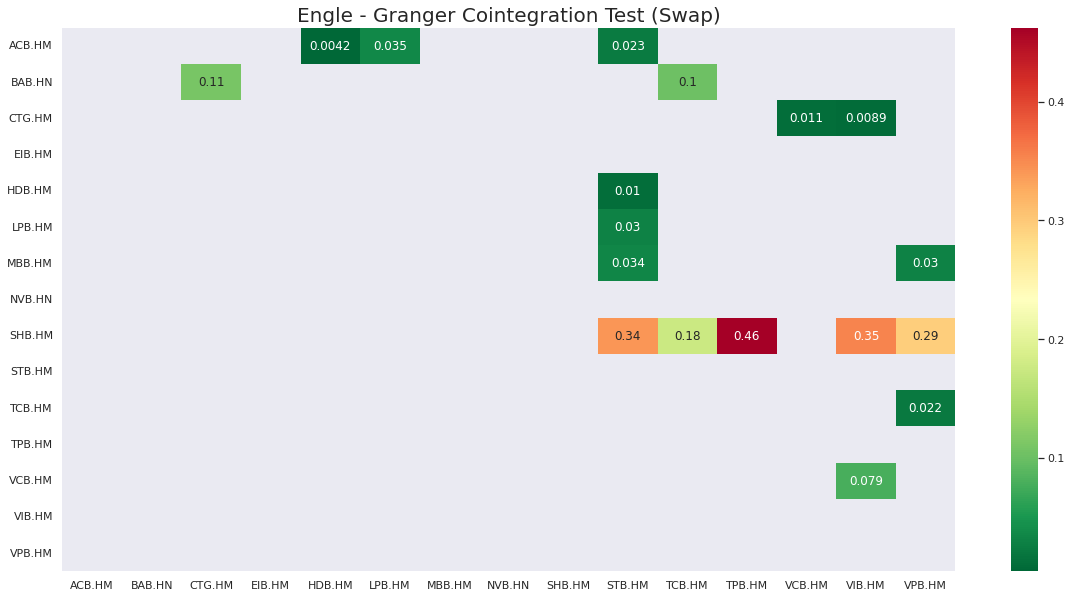

In [86]:
scores_swap, pvalues_swap, pairs_swap = find_cointegrated_pairs_swap(egjj_transformed_train_set)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(pvalues_swap, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05), annot=True
                )

plt.title('Engle - Granger Cointegration Test (Swap)', fontsize = 20)
for element in pairs_swap:
  print(element)

In [87]:
all_pair = pairs.copy()
for e in pairs_swap:
  if e in all_pair or e[::-1] in all_pair:
    pass
  else:
    all_pair.append(e)

for i in all_pair:
  print(i)


len(all_pair)

['ACB.HM', 'HDB.HM']
['ACB.HM', 'LPB.HM']
['ACB.HM', 'STB.HM']
['BAB.HN', 'CTG.HM']
['BAB.HN', 'TCB.HM']
['CTG.HM', 'VCB.HM']
['CTG.HM', 'VIB.HM']
['HDB.HM', 'STB.HM']
['LPB.HM', 'STB.HM']
['MBB.HM', 'STB.HM']
['MBB.HM', 'VPB.HM']
['SHB.HM', 'STB.HM']
['SHB.HM', 'TCB.HM']
['SHB.HM', 'TPB.HM']
['SHB.HM', 'VIB.HM']
['SHB.HM', 'VPB.HM']
['TCB.HM', 'VPB.HM']
['VCB.HM', 'VIB.HM']
['ACB.HM', 'SHB.HM']
['CTG.HM', 'SHB.HM']
['EIB.HM', 'SHB.HM']
['HDB.HM', 'SHB.HM']
['LPB.HM', 'SHB.HM']
['MBB.HM', 'SHB.HM']
['NVB.HN', 'SHB.HM']


25

### **Phương pháp Johansen Test** 

Reference: https://www.quantrocket.com/codeload/pairs-pipeline/pairs_pipeline/Part3-Pairs-Selection-Pipeline.ipynb.html 

In [88]:
all_pairs = list(itertools.combinations(egjj_transformed_train_set.columns.tolist(), 2))

print(f"formed {len(all_pairs)} total pairs")

formed 105 total pairs


According to Cheung and Lai (1993), if there are diverse results from the trace and max tests, then a preference will be given to the trace test. 
Ref: https://www.tandfonline.com/doi/pdf/10.1080/1331677X.2017.1340176 
https://www.researchgate.net/post/In_case_of_Johansen_Cointegration_test_what_to_do_when_Result_of_trace_test_and_Maximum_Eigenvalue_test_differs 

In [89]:
cointegrating_pairs= []
cointegration_pairs = []

for i, (sid_1, sid_2) in enumerate(all_pairs):
    
    pair_closes = egjj_transformed_train_set[[sid_1, sid_2]].dropna()

    # The second and third parameters indicate constant term, with a lag of 1. 
    # See Chan, Algorithmic Trading, chapter 2.
    result = coint_johansen(pair_closes, 0, 1)
    
    # the 90%, 95%, and 99% confidence levels for the trace statistic and maximum 
    # eigenvalue statistic are stored in the first, second, and third column of 
    # cvt and cvm, respectively
    confidence_level_cols = {
        90: 0,
        95: 1,
        99: 2
    }
    confidence_level_col = confidence_level_cols[95]
    
    trace_crit_value = result.cvt[:, confidence_level_col]
    eigen_crit_value = result.cvm[:, confidence_level_col]
    
    # The trace statistic and maximum eigenvalue statistic are stored in lr1 and lr2;
    # see if they exceeded the confidence threshold

    # if np.all(result.lr1[0] >= trace_crit_value[0]) and np.all(result.lr2[0] >= eigen_crit_value[0]):
    # not checking for eigenvalue

    if np.all(result.lr1[0] >= trace_crit_value[0]):
        
      cointegrating_pairs.append(dict(
            sid_1=sid_1,
            sid_2=sid_2
        ))
      cointegration_pairs.append([sid_1, sid_2])

In [90]:
cointegrating_pairs, len(cointegrating_pairs)

([{'sid_1': 'ACB.HM', 'sid_2': 'HDB.HM'},
  {'sid_1': 'BAB.HN', 'sid_2': 'SHB.HM'},
  {'sid_1': 'CTG.HM', 'sid_2': 'MBB.HM'},
  {'sid_1': 'CTG.HM', 'sid_2': 'VCB.HM'},
  {'sid_1': 'CTG.HM', 'sid_2': 'VIB.HM'},
  {'sid_1': 'HDB.HM', 'sid_2': 'STB.HM'},
  {'sid_1': 'LPB.HM', 'sid_2': 'SHB.HM'},
  {'sid_1': 'LPB.HM', 'sid_2': 'STB.HM'},
  {'sid_1': 'MBB.HM', 'sid_2': 'SHB.HM'},
  {'sid_1': 'SHB.HM', 'sid_2': 'TCB.HM'}],
 10)

In [91]:
cointegration_pairs, len(cointegration_pairs)

([['ACB.HM', 'HDB.HM'],
  ['BAB.HN', 'SHB.HM'],
  ['CTG.HM', 'MBB.HM'],
  ['CTG.HM', 'VCB.HM'],
  ['CTG.HM', 'VIB.HM'],
  ['HDB.HM', 'STB.HM'],
  ['LPB.HM', 'SHB.HM'],
  ['LPB.HM', 'STB.HM'],
  ['MBB.HM', 'SHB.HM'],
  ['SHB.HM', 'TCB.HM']],
 10)

# **Bounds Testing Procedure**

#### **Optimal Lag length and Model Specification Selection**

In [92]:
# stock_1 = 'HDB.HM'
# stock_2 = 'EIB.HM'

In [93]:
# max_lag_endog = int(np.log(len(transformed_train_set)))
# max_lag_exog = int(np.log(len(transformed_train_set)))

In [94]:
# sel_res_n = ardl_select_order(transformed_train_set[[stock_1]], max_lag_endog, transformed_train_set[[stock_2]], max_lag_exog, ic="aic", trend="n")

# res_n = sel_res_n.model.fit()
# res_n.summary()
# res_n.summary()

In [95]:
# sel_res_c = ardl_select_order(transformed_train_set[[stock_1]], max_lag_endog, transformed_train_set[[stock_2]], max_lag_exog, ic="aic", trend="c")

# res_c = sel_res_c.model.fit()
# res_c.summary()
# res_c.summary()

In [96]:
# sel_res_t = ardl_select_order(transformed_train_set[[stock_1]], max_lag_endog, transformed_train_set[[stock_2]], max_lag_exog, ic="aic", trend="t")

# res_t = sel_res_t.model.fit()
# res_t.summary()
# res_t.summary()

In [97]:
# sel_res_ct = ardl_select_order(transformed_train_set[[stock_1]], max_lag_endog, transformed_train_set[[stock_2]], max_lag_exog, ic="aic", trend="ct")

# res_ct = sel_res_ct.model.fit()
# res_ct.summary()
# res_ct.summary()

#### **Bounds Testing**

In [98]:
# lag_endog, lag_exog = 3,2

In [99]:
# ecm = UECM(transformed_train_set[[stock_1]], lag_endog, transformed_train_set[[stock_2]], lag_exog, trend="ct")
# ecm_fit = ecm.fit()
# bounds_test = ecm_fit.bounds_test(case=5)

# if bounds_test.stat >= bounds_test.crit_vals.iloc[1]['upper']:
#   print("There is cointegration relationship")
# else:
#   print("No relationship")

# **Test** 

In [100]:
fig = px.line(train_set,
              title='Stock Prices', 
              width=1400, height=800,
              )
# fig.update_layout(yaxis_title="Daily Returns (%)")
fig.show()

In [101]:
fig = px.line(transformed_train_set,
              title='Transformed Stock Prices', 
              width=1400, height=800,
              )
# fig.update_layout(yaxis_title="Daily Returns (%)")
fig.show()

In [102]:
#Ho: It is have unit root, non-stationary
#H1: It is stationary

def adfuller_test(input):
    result = adfuller(input)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    # labels = ['p-value']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary \n")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")

In [103]:
def calc_spread(col_combination):
  S1 = transformed_train_set[col_combination[0]]
  S2 = transformed_train_set[col_combination[1]]

  S1 = sm.add_constant(S1)
  results = sm.OLS(S2, S1).fit()
  S1 = S1[col_combination[0]]
  b = results.params[col_combination[0]]

  spread = S2 - b * S1
  return [spread,b, results.rsquared]

In [104]:
def plot_spread(col_combination):
  S1 = transformed_train_set[col_combination[0]]
  S2 = transformed_train_set[col_combination[1]]

  S1 = sm.add_constant(S1)
  results = sm.OLS(S2, S1).fit()
  S1 = S1[col_combination[0]]
  b = results.params[col_combination[0]]

  spread = S2 - b * S1
  spread.plot(figsize=(12,6))
  plt.axhline(spread.mean(), color='black')
  plt.legend(['Spread'])

In [105]:
col_combi = list(itertools.combinations(transformed_train_set.columns.tolist(), 2))

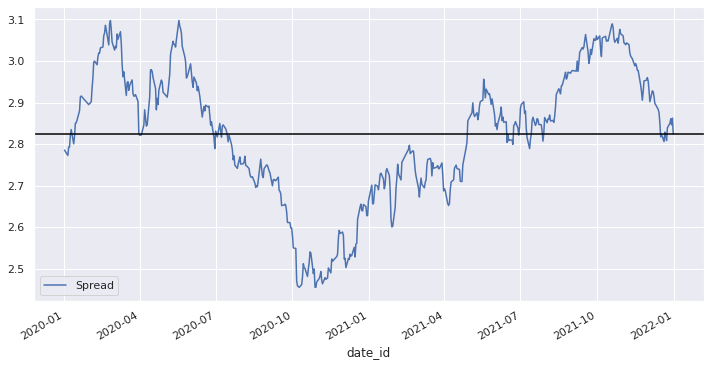

In [106]:
plot_spread(['VIB.HM', 'VPB.HM'])

In [107]:
adfuller_test(calc_spread(['VIB.HM', 'VPB.HM'])[0])
print(f"Coeff: {calc_spread(['VIB.HM', 'VPB.HM'])[1]}")
print(f"R-squared: {calc_spread(['VIB.HM', 'VPB.HM'])[2]}")

ADF Test Statistic : -1.69479838427147
p-value : 0.43379447894406375
#Lags Used : 1
Number of Observations Used : 500
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

Coeff: 0.732115500370265
R-squared: 0.883858052607966


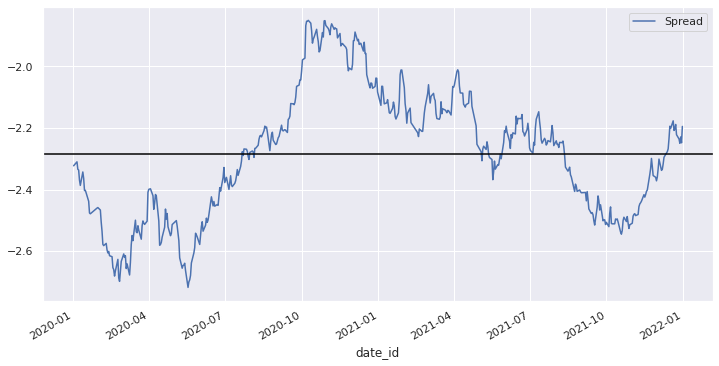

In [108]:
plot_spread(['VPB.HM','VIB.HM'])

In [109]:
adfuller_test(calc_spread(['VPB.HM','VIB.HM'])[0])
print(f"Coeff: {calc_spread(['VPB.HM','VIB.HM'])[1]}")
print(f"R-squared: {calc_spread(['VPB.HM','VIB.HM'])[2]}")

ADF Test Statistic : -1.5882633636817494
p-value : 0.48948650130752325
#Lags Used : 1
Number of Observations Used : 500
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

Coeff: 1.2072658646906897
R-squared: 0.883858052607966
